# Advanced Regression Assignment
## House Price Evaluation model using Linear, Ridge and Lasso Regression

#### Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. Company has requirement to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal
This assignment is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Steps
The assignment is divided into five steps
1. Reading data
2. Understanding of Data
3. Preprocessing of Data
4. Model Building
5. Conclusion

#### Reading Data 

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df_house = pd.read_csv('train.csv')
df_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# summary of dataset before EDA
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# No of numeric columns (1460 rows × 38 columns)
df_house.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [5]:
# No of non numeric columns (1460 rows × 38 columns)
df_house.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [6]:
# checking for NaN values
df_house.isnull().all()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
# category columns containing null values.
df_house_null = df_house.select_dtypes(include='object').isnull().sum()
df_house_null[df_house_null > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Fill missing values with None
null_columns = df_house_null[df_house_null > 0].keys()
for column in null_columns:
    df_house[column] = df_house[column].fillna('None')
    
# Again checking for any NaN values
df_house_null = df_house.select_dtypes(include='object').isnull().sum()
df_house_null[df_house_null > 0]

Series([], dtype: int64)

In [9]:
# Dropping category columns having 80% of missing values
missing_category_columns = []
for column in df_house.select_dtypes(include='object'):
    max_value = df_house[column].value_counts(normalize=True).max()
    print(f"{column} \t\t = {max_value}")
    if max_value > 0.8:
        missing_category_columns.append(column)

MSZoning 		 = 0.7883561643835616
Street 		 = 0.9958904109589041
Alley 		 = 0.9376712328767123
LotShape 		 = 0.6335616438356164
LandContour 		 = 0.897945205479452
Utilities 		 = 0.9993150684931507
LotConfig 		 = 0.7205479452054795
LandSlope 		 = 0.9465753424657535
Neighborhood 		 = 0.1541095890410959
Condition1 		 = 0.863013698630137
Condition2 		 = 0.9897260273972602
BldgType 		 = 0.8356164383561644
HouseStyle 		 = 0.49726027397260275
RoofStyle 		 = 0.7815068493150685
RoofMatl 		 = 0.9821917808219178
Exterior1st 		 = 0.3527397260273973
Exterior2nd 		 = 0.3452054794520548
MasVnrType 		 = 0.5972602739726027
ExterQual 		 = 0.6205479452054794
ExterCond 		 = 0.8780821917808219
Foundation 		 = 0.44315068493150683
BsmtQual 		 = 0.44452054794520546
BsmtCond 		 = 0.897945205479452
BsmtExposure 		 = 0.6527397260273973
BsmtFinType1 		 = 0.2945205479452055
BsmtFinType2 		 = 0.8602739726027397
Heating 		 = 0.9780821917808219
HeatingQC 		 = 0.5075342465753425
CentralAir 		 = 0.934931506849315
Electr

In [10]:
missing_category_columns

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
# Dropping Category Columns
df_house.drop(missing_category_columns, axis=1, inplace = True)

In [12]:
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [13]:
# filtering values in numeric column having same above 80%
numeric_columns = []

for column in df_house.select_dtypes(include=['int64','float64']):
    if df_house[column].value_counts(normalize=True).max() > 0.80:
        numeric_columns.append(column)

numeric_columns
# df_house.drop(null_numeric_columns, axis=1, inplace=True)

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [14]:
# Dropping Category Columns
df_house.drop(numeric_columns, axis=1, inplace = True)

In [15]:
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF       MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean     94.244521    46.660274     6.321918  2007.815753  180921.195890  
std     125.338794    66.256028     2.703626     1.328095   79442.502883  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000    25.000000     6.000000  2008.000000  163000.000000  
75%     168.000000    68.000000     8.000000  2009.000000  214000.000000  
max     857.000000   547.000000    12.000000  2010.000000  755000.000000  

[8 rows x 29 columns]

In [16]:
df_house.shape

(1460, 48)

In [17]:
# Find the null values in numeric columns and replace them.
num_columns = df_house.select_dtypes(include=['int64','float64'])
num_null_columns = num_columns.isnull().sum()[num_columns.isnull().sum()>0]
num_null_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# Replacing these 3 column data to their respective mean values
for column in num_null_columns.keys():
    df_house[column] = df_house[column].replace(np.nan ,df_house[column].median())

In [19]:
# Check if there any null values
df_house.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [20]:
# Droping id, MoSold columns as it not required for analysis
df_house.drop(['Id', 'MoSold'], axis=1, inplace=True)

In [21]:
target_variable = 'SalePrice'

In [22]:
df_house.shape

(1460, 46)

In [23]:
df_house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  ...  FireplaceQu  GarageType  \
0     2Story            7            5  ...         None      Attchd   
1     1Story            6            8  ...           TA      Attchd   
2     2Story            7            5  ...           TA      Attchd   
3     2Story            7            5  ...           Gd      Detchd   
4     2Story            8            5  ...           TA      Attchd   

  GarageYrBlt GarageFinish GarageCars GarageArea  WoodDeckSF OpenPorchSF  \
0      2003.0          RFn          2        548           0          61   
1      1976.0          RFn          2        460         298           0   
2      2001.0          RFn          2        608           0          42   
3      1998.0          Unf          3        642           0          35   
4      2000.0          RFn          3        836         192          84   

  YrSold SalePrice  
0   2008    208500  
1   2007    181500  
2   2008    223500  
3   2006    140000  
4   2008    250000  

[5 rows x 46 columns]

In [24]:
# Checking for any outliners 
df_house.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1    BsmtUnfSF  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726   567.240411  ...   
std      30.202904     20.645407   180.731373   456.098091   441.866955  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000   477.500000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000   808.000000  ...   
90%    2006.000000   2006.000000   335.000000  1065.500000  1232.000000  ...   
95%    2007.000000   2007.000000   456.000000  1274.000000  1468.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  2336.000000  ...   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014  1978.589041     1.767123   
std        0.815778      1.625393     0.644666    23.997022     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        2.000000      5.000000     0.000000  1962.000000     1.000000   
50%        3.000000      6.000000     1.000000  1980.000000     2.000000   
75%        3.000000      7.000000     1.000000  2001.000000     2.000000   
90%        4.000000      9.000000     1.000000  2006.000000     3.000000   
95%        4.000000     10.000000     2.000000  2007.000000     3.000000   
max        8.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF       YrSold      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean    472.980137    94.244521    46.660274  2007.815753  180921.195890  
std     213.804841   125.338794    66.256028     1.328095   79442.502883  
min       0.000000     0.000000     0.000000  2006.000000   34900.000000  
25%     334.500000     0.000000     0.000000  2007.000000  129975.000000  
50%     480.000000     0.000000    25.000000  2008.000000  163000.000000  
75%     576.000000   168.000000    68.000000  2009.000000  214000.000000  
90%     757.100000   262.000000   130.000000  2010.000000  278000.000000  
95%     850.100000   335.000000   175.050000  2010.000000  326100.000000  
max    1418.000000   857.000000   547.000000  2010.000000  755000.000000  

[10 rows x 27 columns]

In [25]:
num_column_keys = df_house.select_dtypes(include=['int64','float64']).columns
q1 = df_house[num_column_keys].quantile(0.05)
q3 = df_house[num_column_keys].quantile(0.95)

# IQR (Inter Quartile Range)
IQR = q3 - q1
IQR

MSSubClass         140.00
LotFrontage         68.05
LotArea          14089.45
OverallQual          4.00
OverallCond          4.00
YearBuilt           91.00
YearRemodAdd        57.00
MasVnrArea         456.00
BsmtFinSF1        1274.00
BsmtUnfSF         1468.00
TotalBsmtSF       1233.70
1stFlrSF          1158.30
2ndFlrSF          1141.05
GrLivArea         1618.10
BsmtFullBath         1.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         2.00
TotRmsAbvGrd         6.00
Fireplaces           2.00
GarageYrBlt         77.00
GarageCars           3.00
GarageArea         850.10
WoodDeckSF         335.00
OpenPorchSF        175.05
YrSold               4.00
SalePrice       238100.00
dtype: float64

In [26]:
# lower bound
lower = q1 - 1.5*IQR

# upper bound
upper = q3 + 1.5*IQR

In [27]:
df_house = df_house[~((df_house[num_column_keys] < lower) | (df_house[num_column_keys] > upper)).any(axis=1)]

In [28]:
df_house.shape

(1435, 46)

<AxesSubplot: ylabel='SalePrice'>

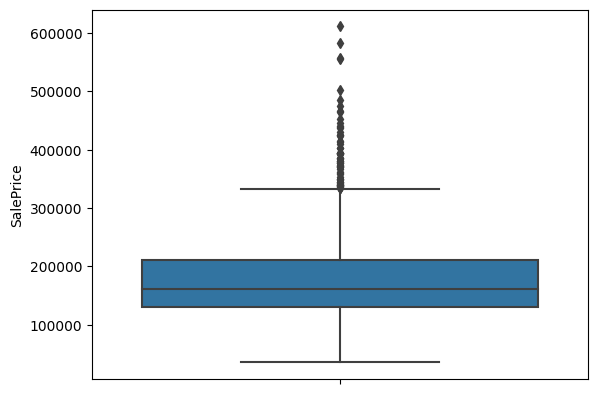

In [29]:
# BoxPlot for Outcome Column SalePrice
sns.boxplot(x=None, y=df_house[target_variable])

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

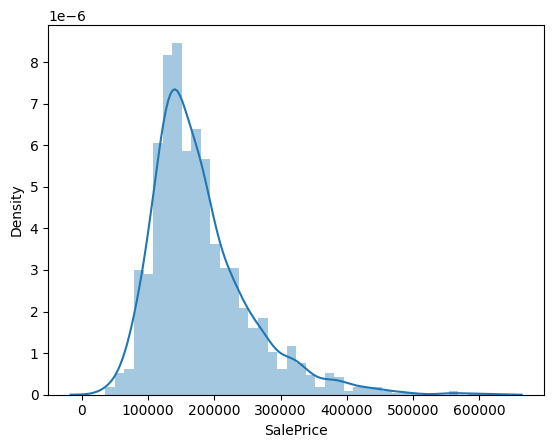

In [30]:
# Distplot
sns.distplot(df_house[target_variable])

In [31]:
# checking for SalePrice skew
df_house[target_variable].skew()

1.5065881718142737

In [32]:
df_house[target_variable].kurt()

3.497550314391881

Looks Like skewness is greater than 1, so target variable is highly skewed

In [33]:
df_house[target_variable] = np.log1p(df_house[target_variable])
df_house[target_variable].skew()

0.08058993432472616

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

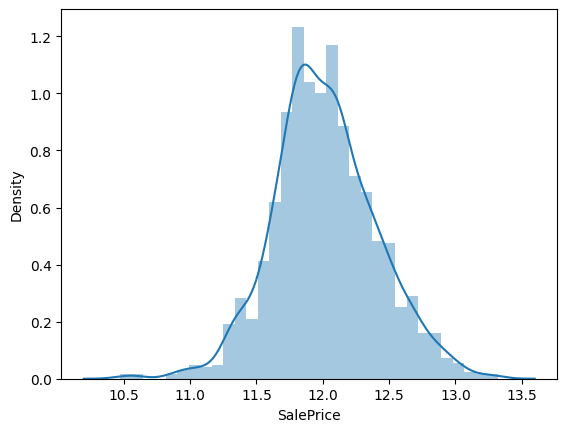

In [34]:
sns.distplot(df_house[target_variable])

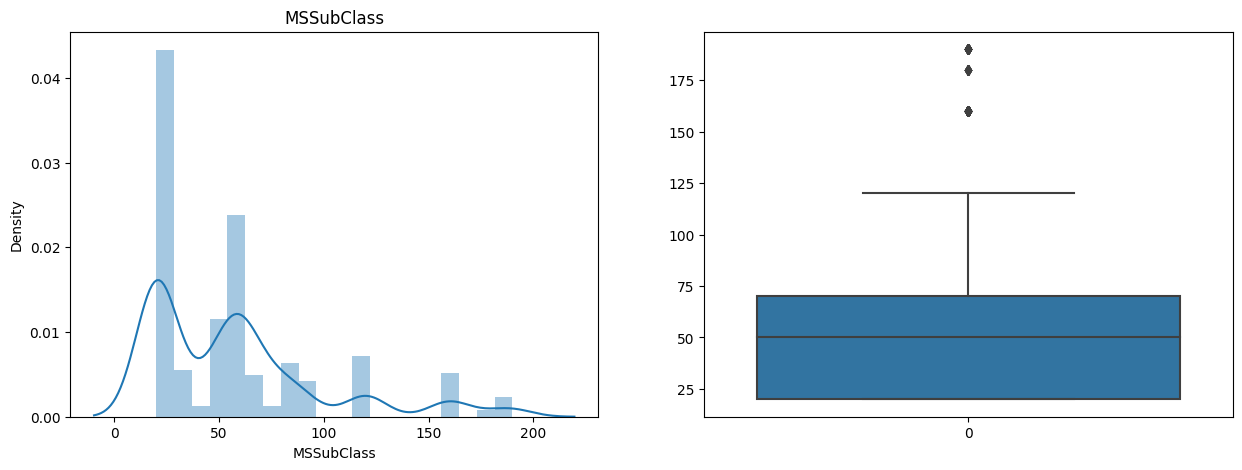

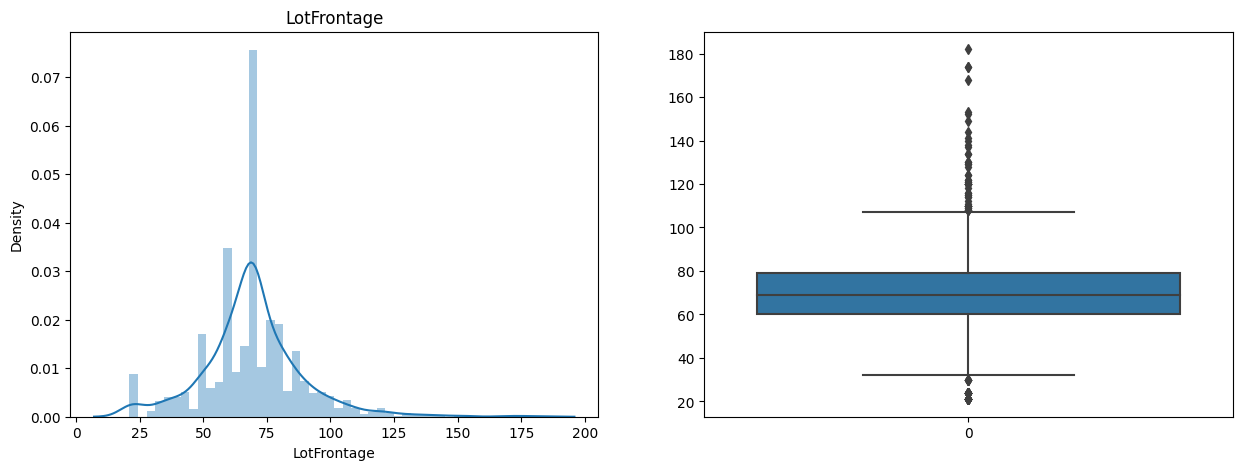

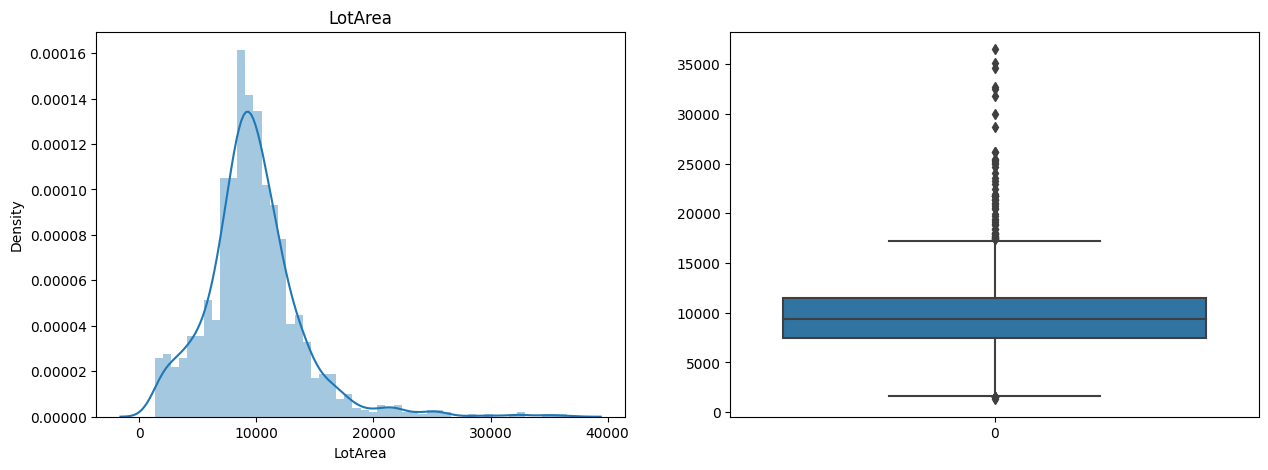

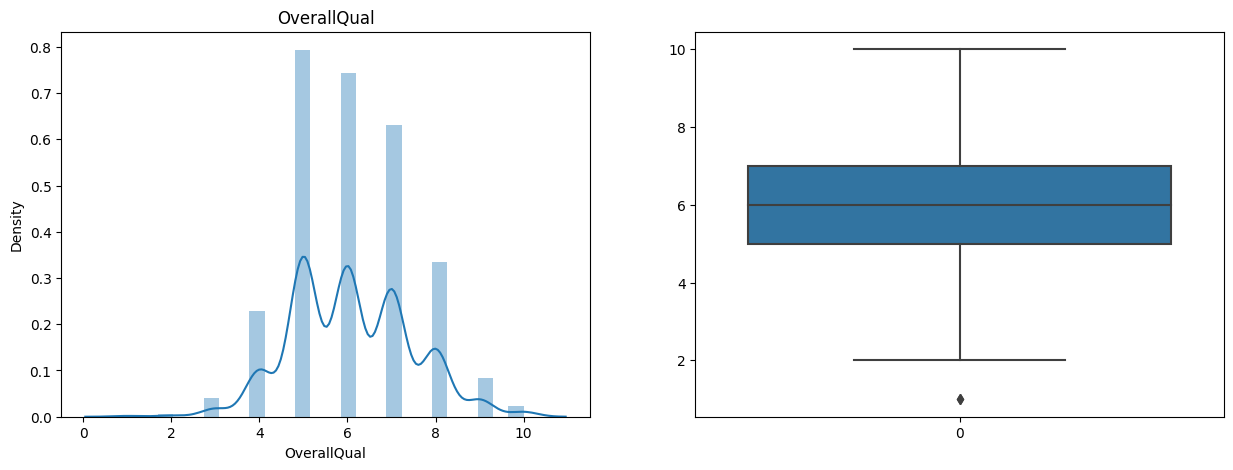

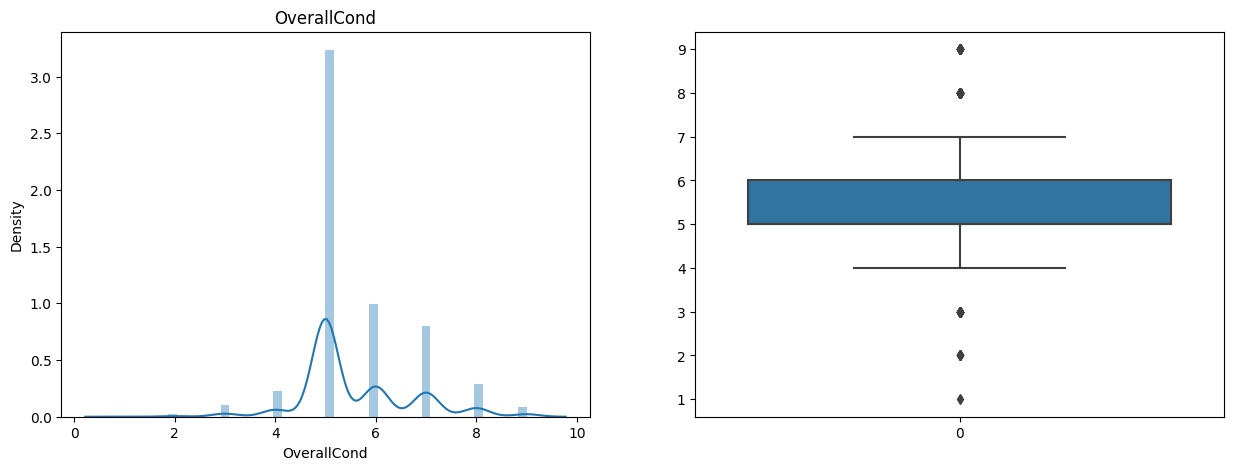

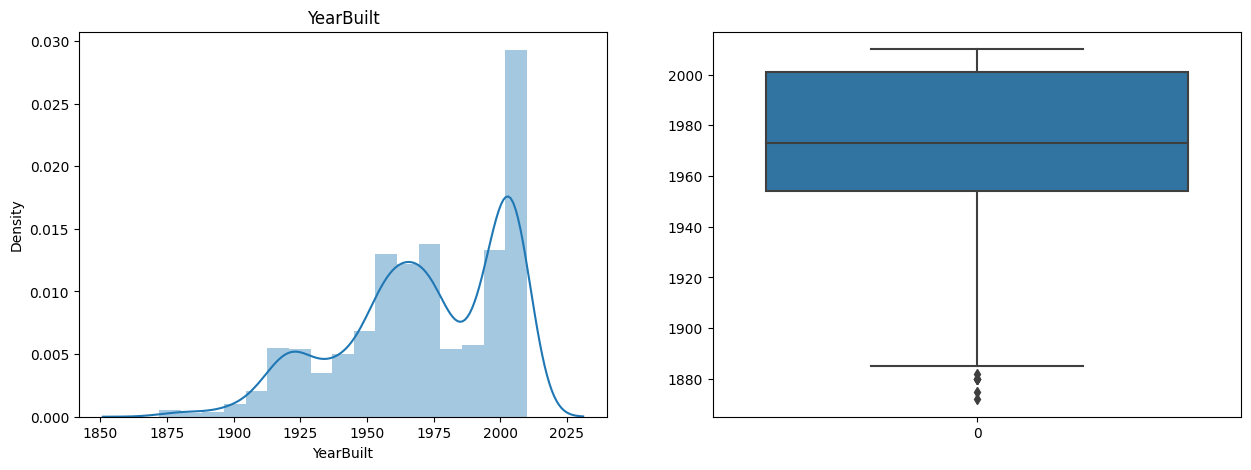

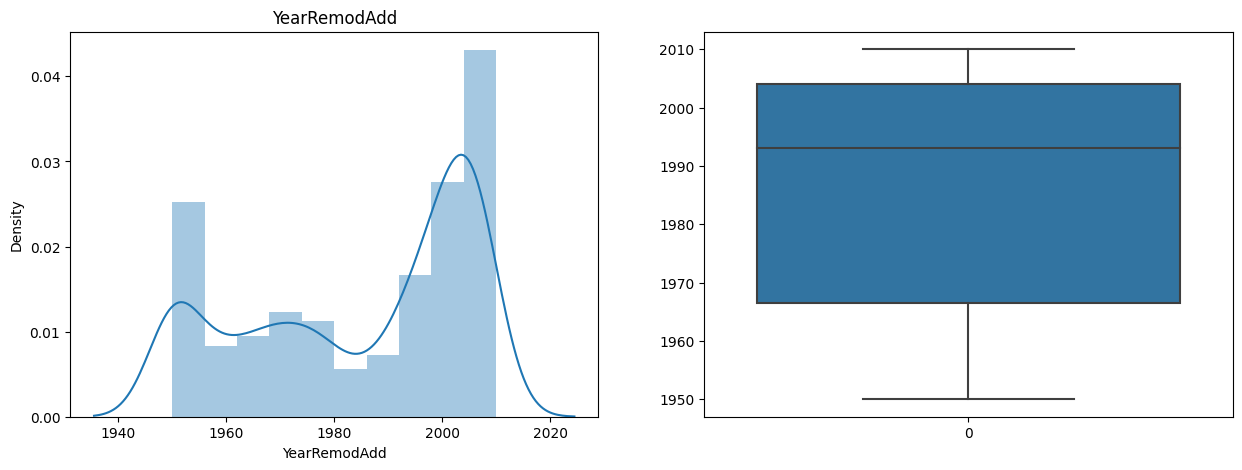

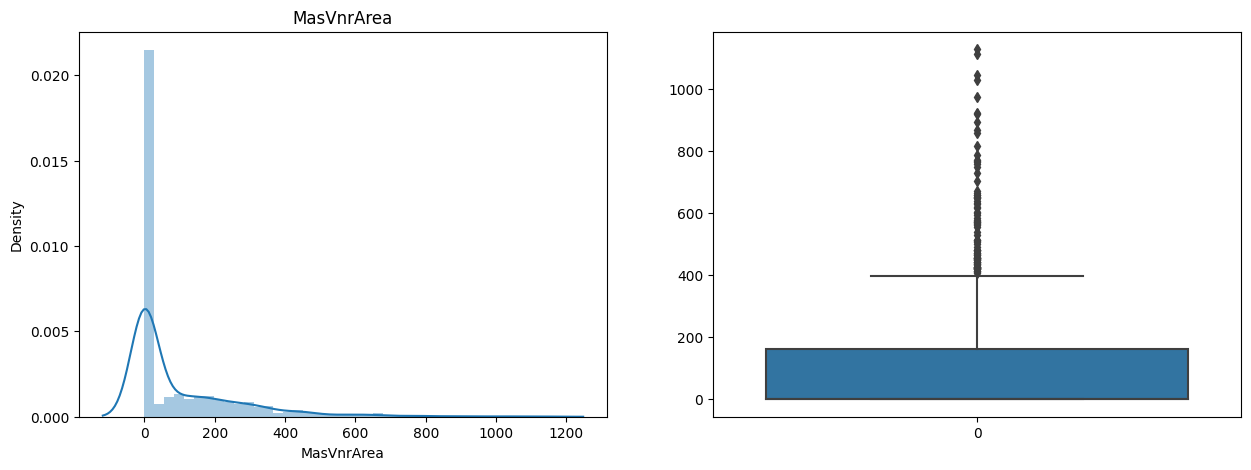

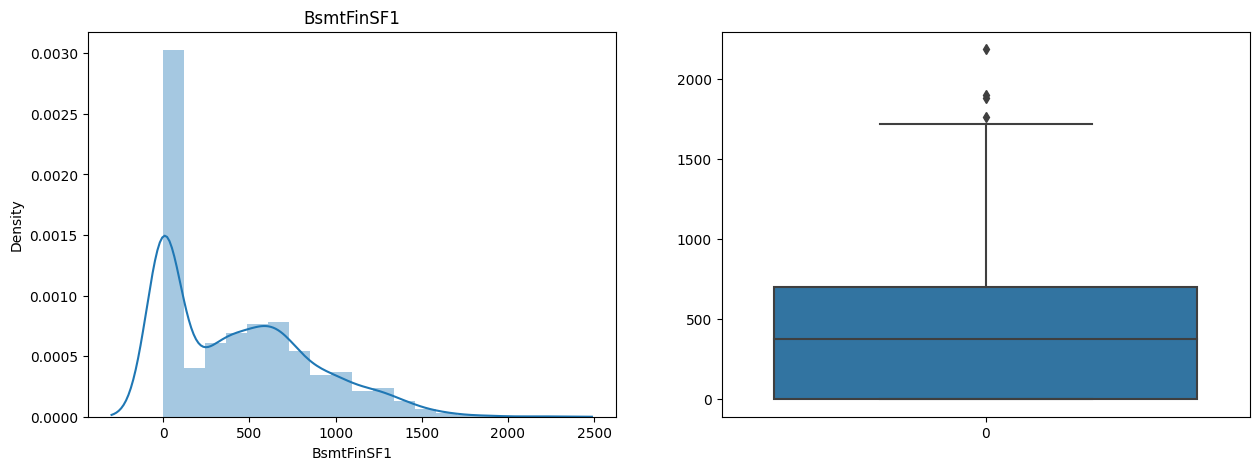

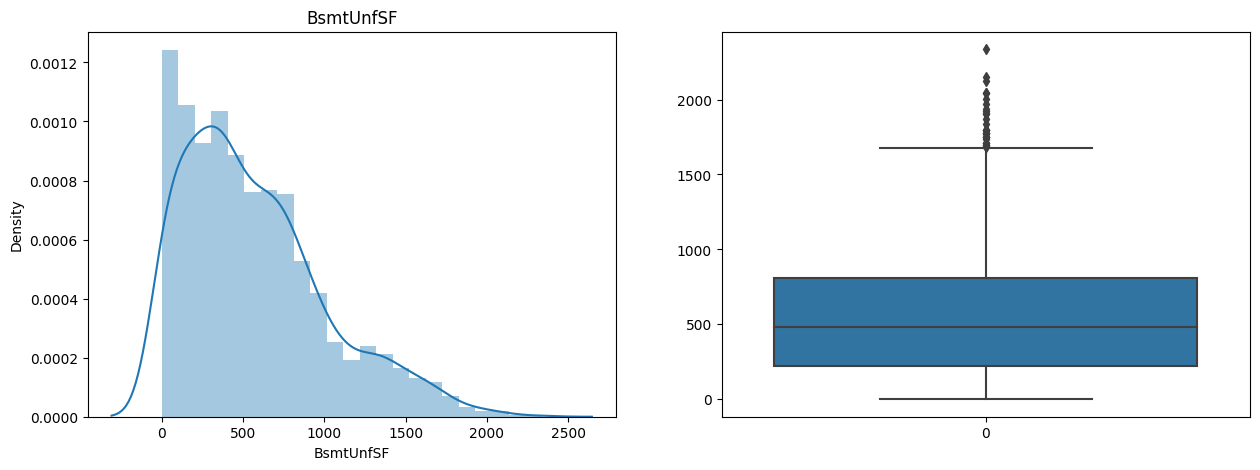

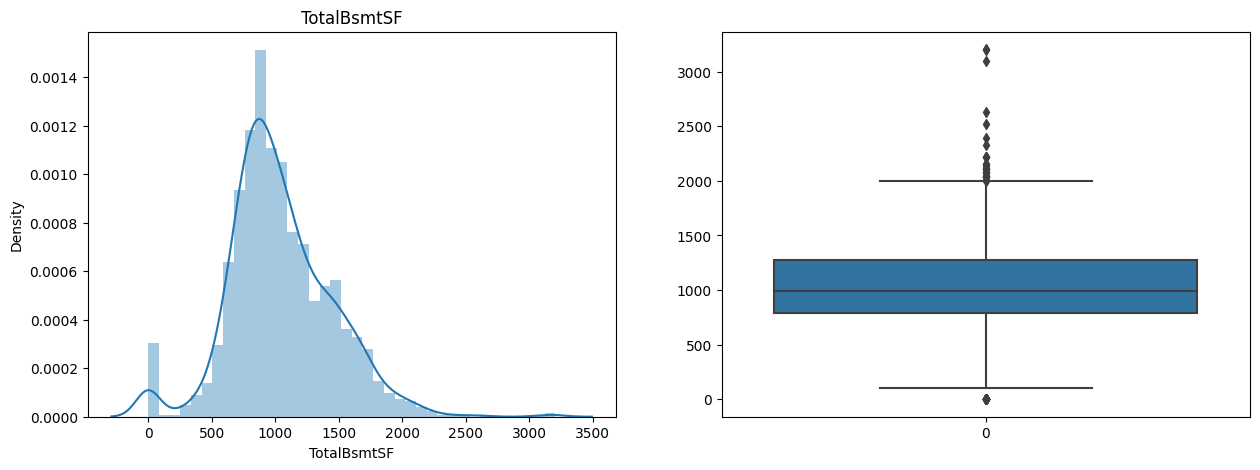

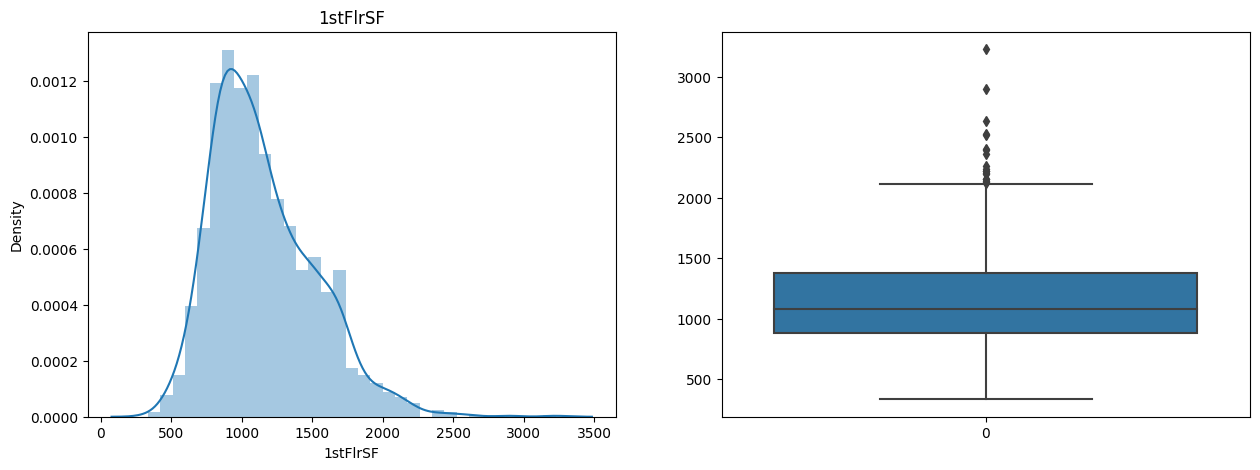

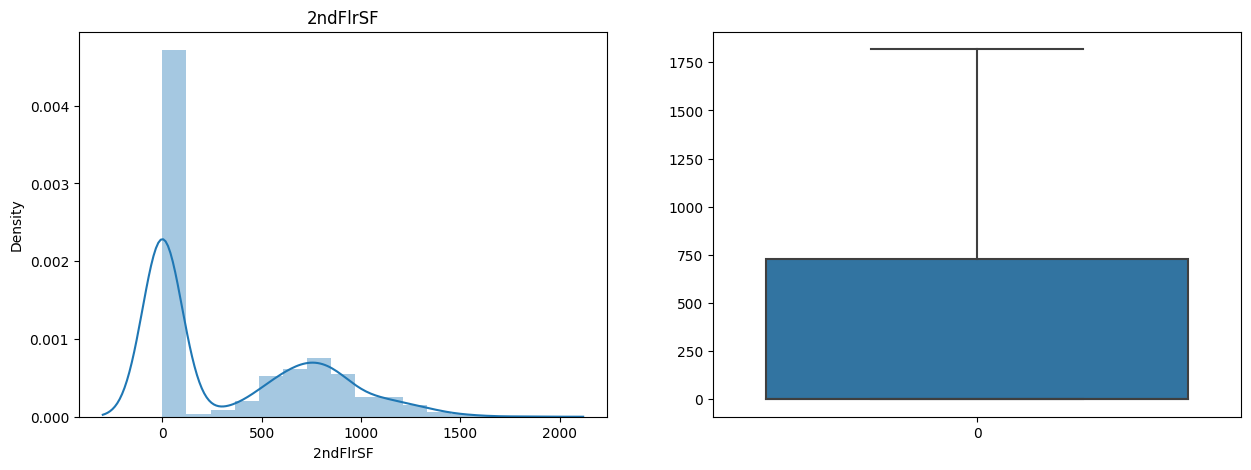

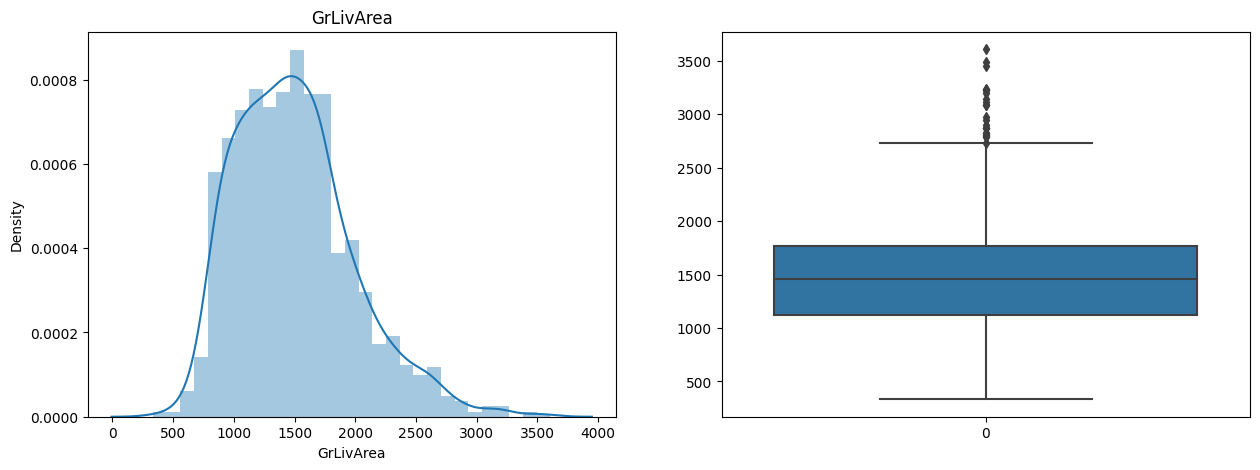

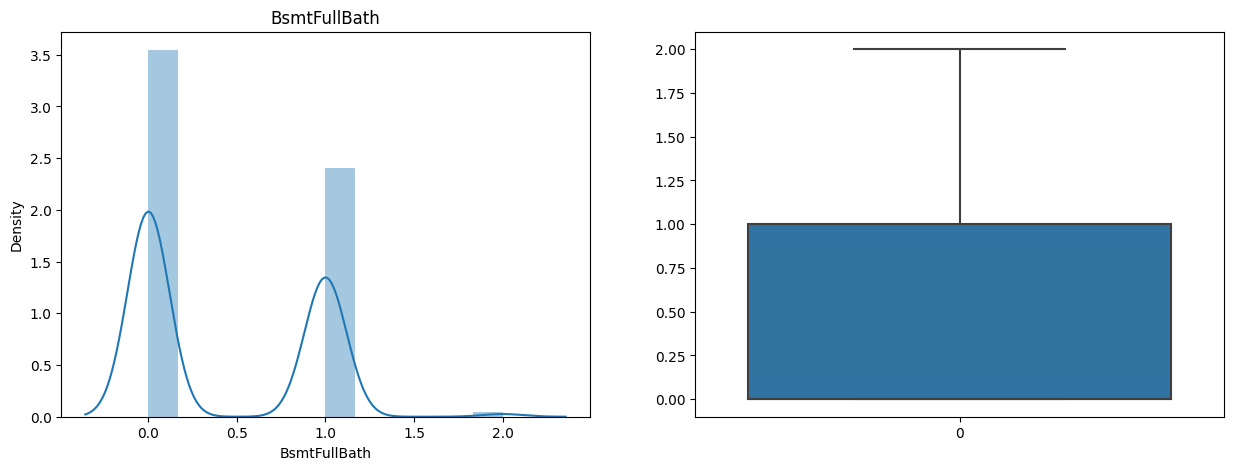

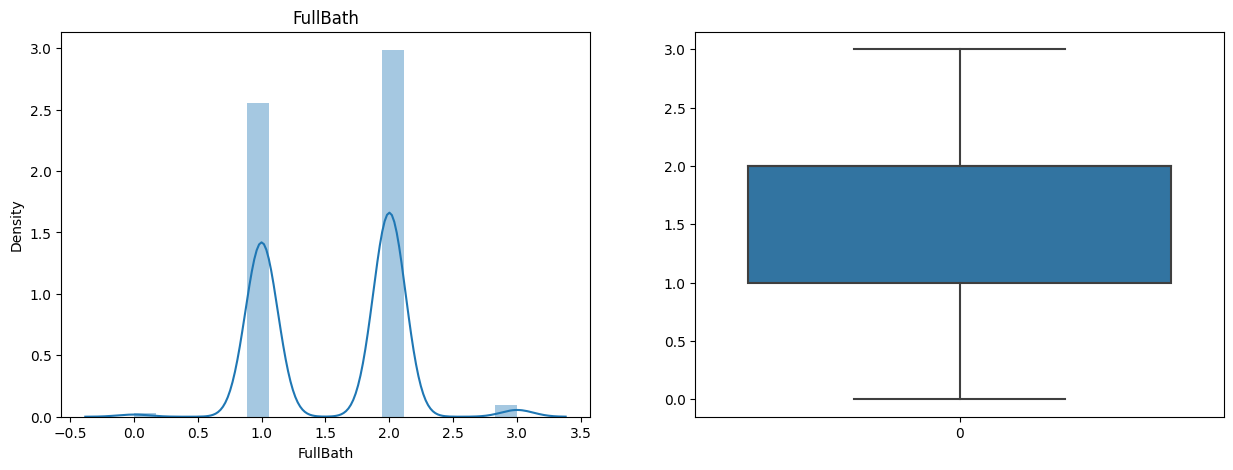

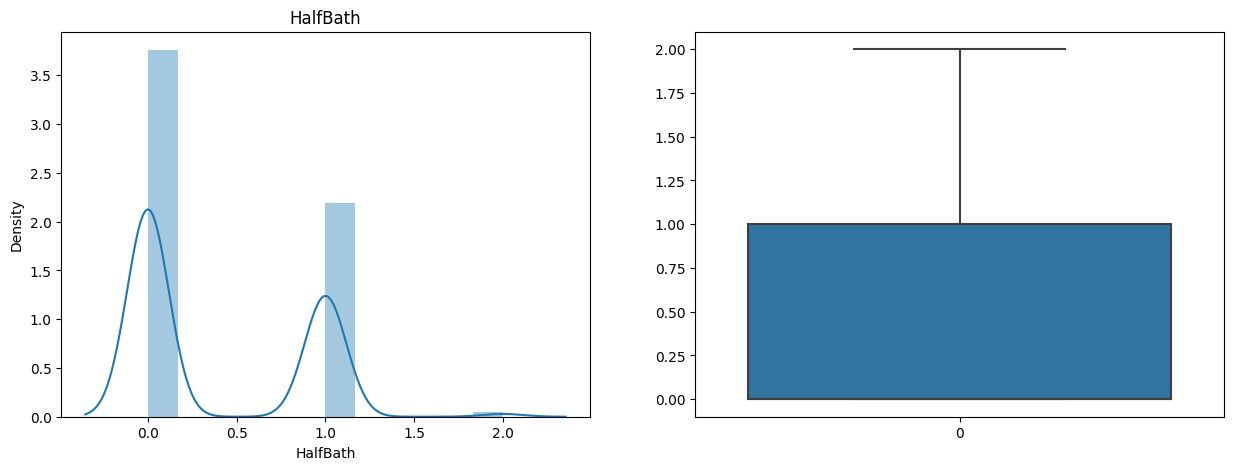

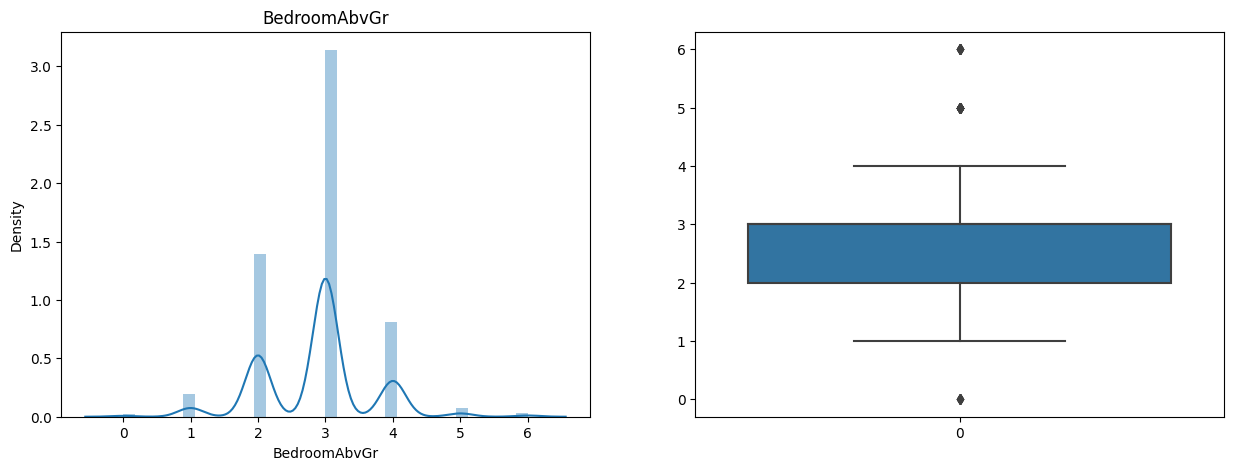

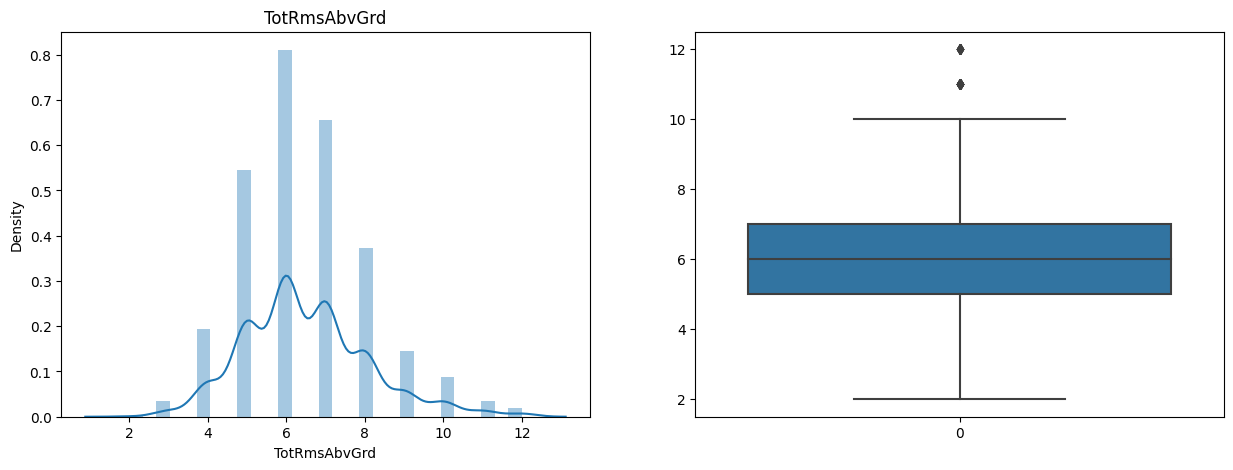

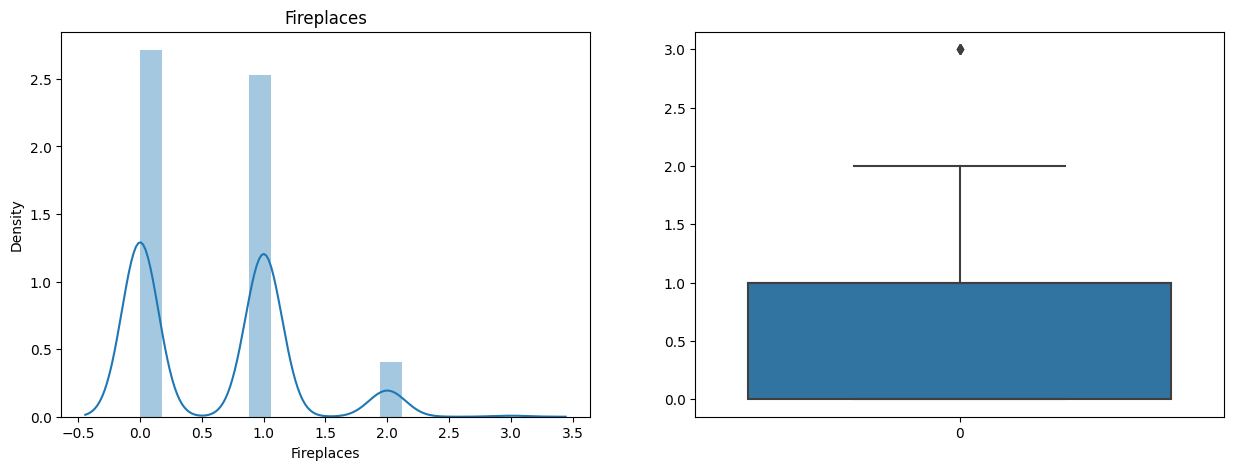

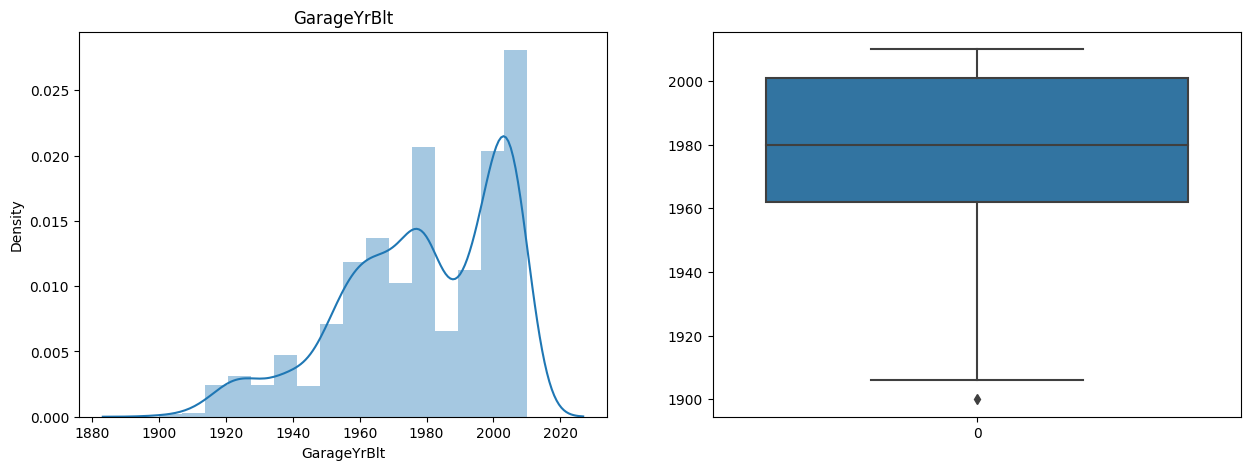

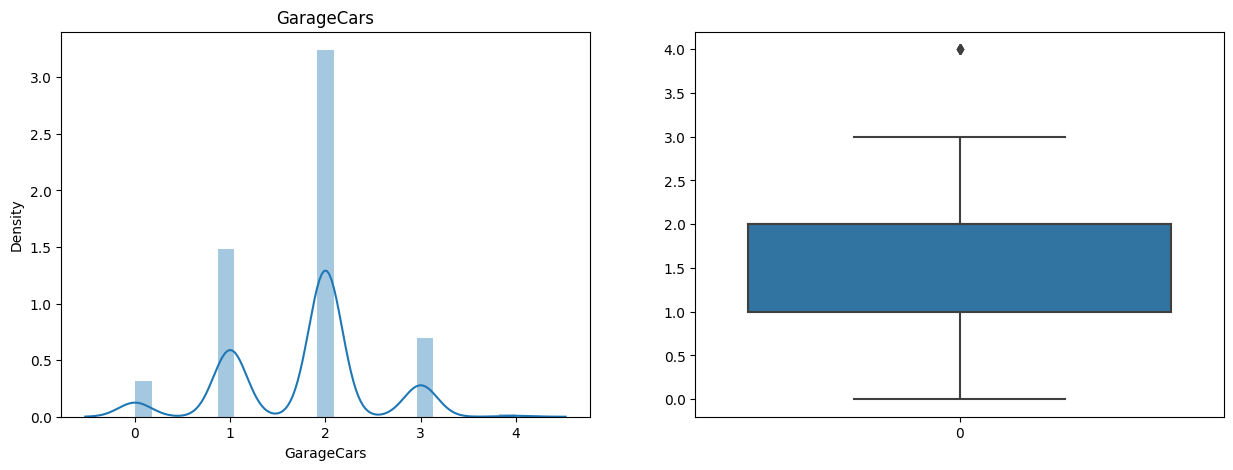

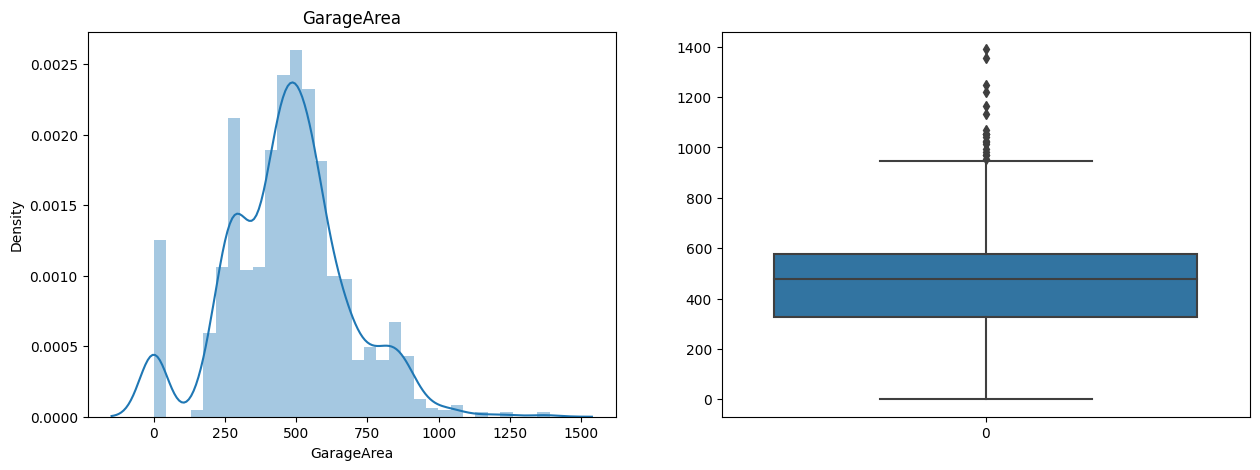

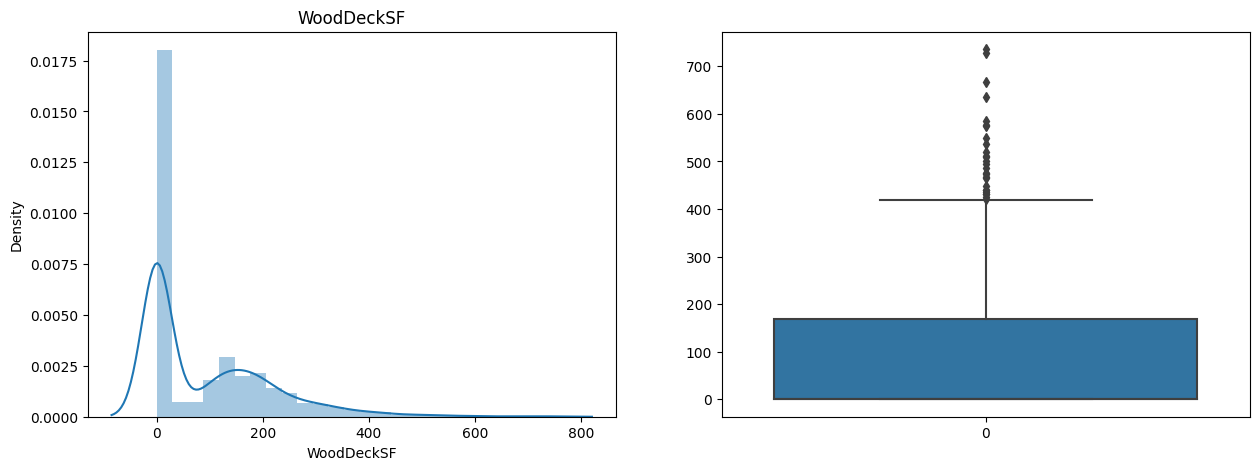

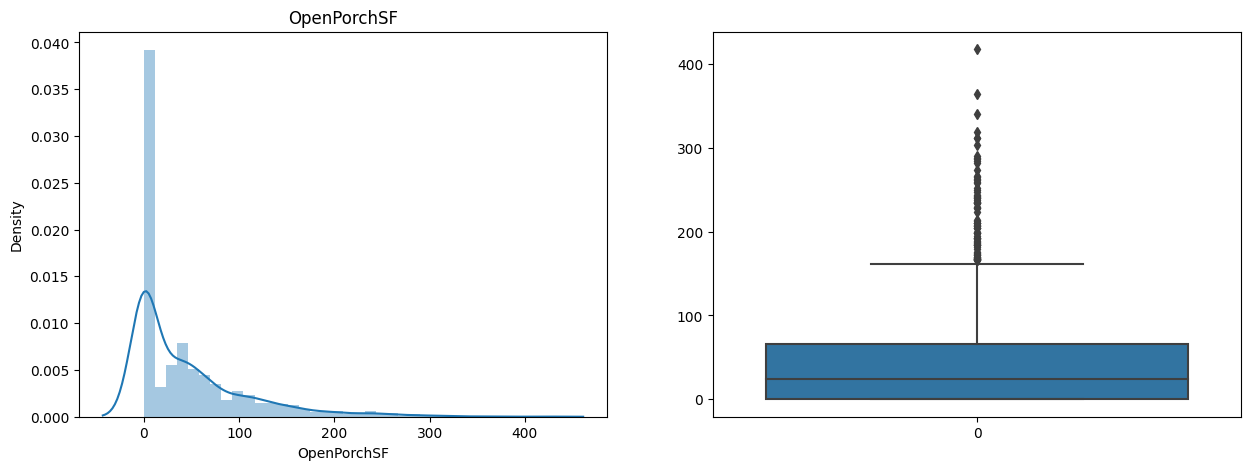

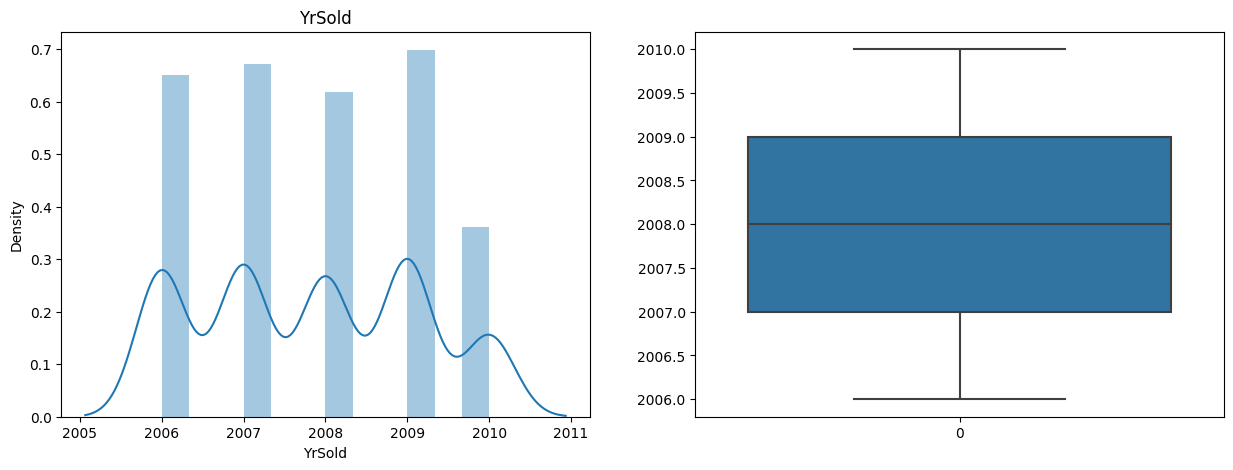

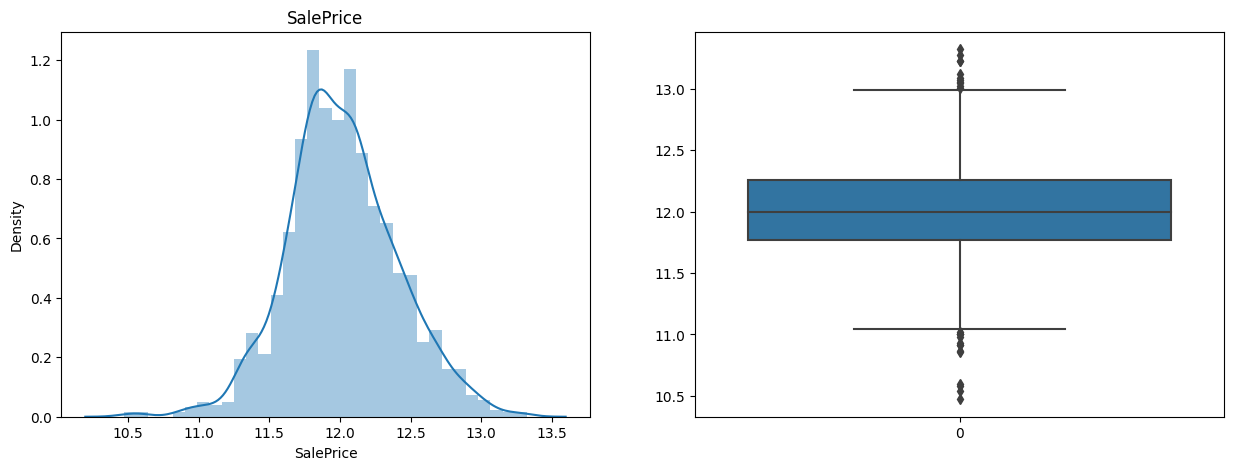

In [35]:
#### View the distribution of all numeric columns
for col in num_column_keys:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.distplot(df_house[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_house[col])
    plt.show()  

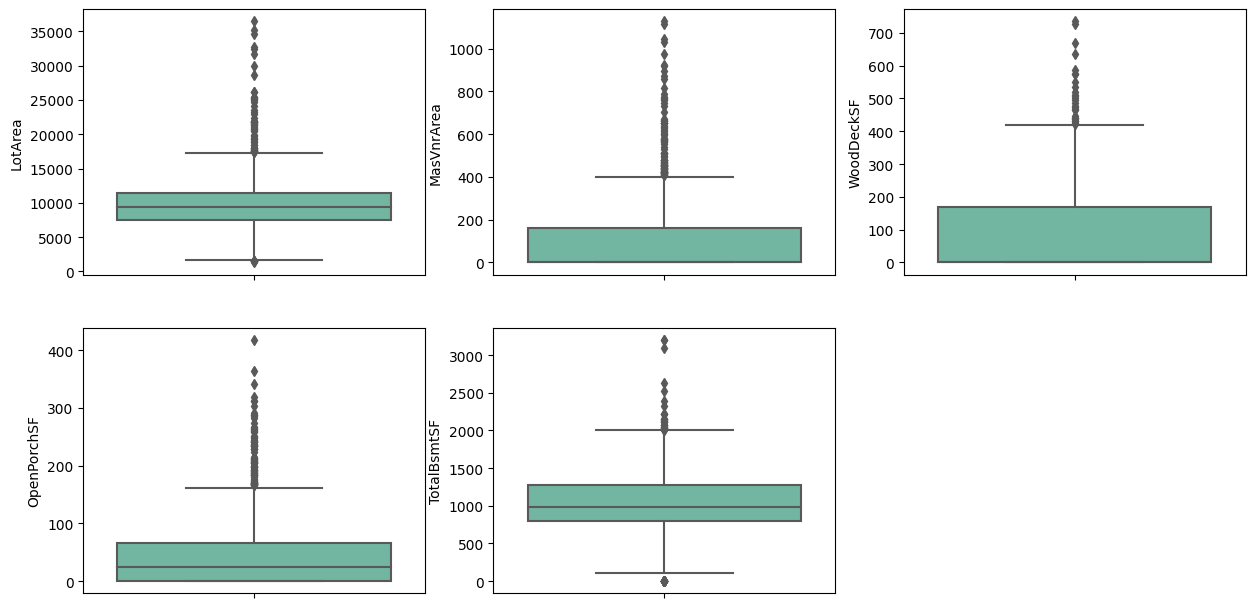

In [36]:
num_list = ['LotArea','MasVnrArea','WoodDeckSF','OpenPorchSF','TotalBsmtSF']

plt.figure(figsize=[15,20])
count=1
for i in num_list:
    plt.subplot(5,3,count)
    sns.boxplot(y=i, palette="Set2", data=df_house)
    count= count+1
plt.show()

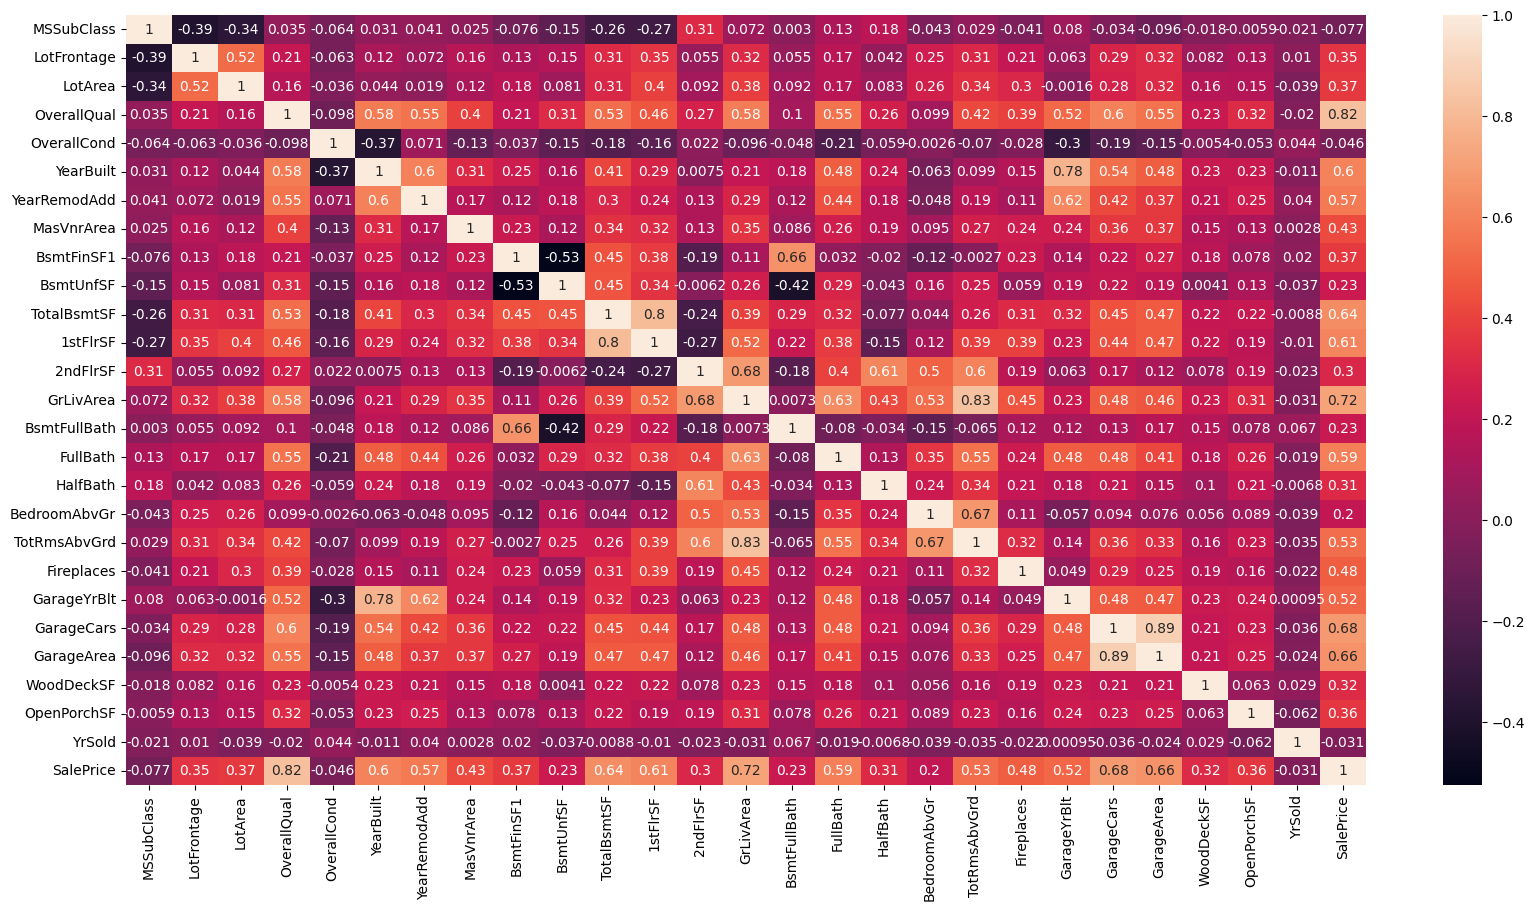

In [37]:
#Correlation matrix for the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_house.corr(), annot=True)
plt.show()

In [38]:
#Adding Column 'Remodelled' if a house is remodelled or not
def house_remodelled(r):
    if(r['YearBuilt'] == r['YearRemodAdd']):
        return 0
    elif(r['YearBuilt'] < r['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_house['Remodelled'] = df_house.apply(house_remodelled, axis=1)

In [39]:
# setting new Column  'oldNewGarage' to check if garage is old(0) or new(1).
def apply_old_or_new_garage(r):
    if r == 0:
        return 0
    elif r >= 1900 and r < 2000:        
        return 0
    else:   
        return 1
    
df_house['oldNewGarage'] = df_house['GarageYrBlt'].apply(apply_old_or_new_garage)

In [40]:
#Adding Column 'BuildRemodelAge' to quantify age of house after being built or remodelled.
def build_remodel_age(r):
    if(r['YearBuilt'] == r['YearRemodAdd']):
        return r['YrSold'] - r['YearBuilt']
    else:
        return r['YrSold'] - r['YearRemodAdd']
       
df_house['BuildRemodelAge'] = df_house.apply(build_remodel_age, axis=1)

In [41]:
#Dropping old features , as they are not required and we have created new features based on them. 
df_house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [42]:
df_house.shape

(1435, 45)

In [43]:
#Check for duplicate values in the dataset
df_house.drop_duplicates()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0             60       RL         65.0     8450      Reg    Inside   
1             20       RL         80.0     9600      Reg       FR2   
2             60       RL         68.0    11250      IR1    Inside   
3             70       RL         60.0     9550      IR1    Corner   
4             60       RL         84.0    14260      IR1       FR2   
...          ...      ...          ...      ...      ...       ...   
1455          60       RL         62.0     7917      Reg    Inside   
1456          20       RL         85.0    13175      Reg    Inside   
1457          70       RL         66.0     9042      Reg    Inside   
1458          20       RL         68.0     9717      Reg    Inside   
1459          20       RL         75.0     9937      Reg    Inside   

     Neighborhood HouseStyle  OverallQual  OverallCond  ... GarageType  \
0         CollgCr     2Story            7            5  ...     Attchd   
1         Veenker     1Story            6            8  ...     Attchd   
2         CollgCr     2Story            7            5  ...     Attchd   
3         Crawfor     2Story            7            5  ...     Detchd   
4         NoRidge     2Story            8            5  ...     Attchd   
...           ...        ...          ...          ...  ...        ...   
1455      Gilbert     2Story            6            5  ...     Attchd   
1456       NWAmes     1Story            6            6  ...     Attchd   
1457      Crawfor     2Story            7            9  ...     Attchd   
1458        NAmes     1Story            5            6  ...     Attchd   
1459      Edwards     1Story            5            6  ...     Attchd   

     GarageFinish GarageCars GarageArea  WoodDeckSF OpenPorchSF  SalePrice  \
0             RFn          2        548           0          61  12.247699   
1             RFn          2        460         298           0  12.109016   
2             RFn          2        608           0          42  12.317171   
3             Unf          3        642           0          35  11.849405   
4             RFn          3        836         192          84  12.429220   
...           ...        ...        ...         ...         ...        ...   
1455          RFn          2        460           0          40  12.072547   
1456          Unf          2        500         349           0  12.254868   
1457          RFn          1        252           0          60  12.493133   
1458          Unf          1        240         366           0  11.864469   
1459          Fin          1        276         736          68  11.901590   

     Remodelled oldNewGarage BuildRemodelAge  
0             0            1               5  
1             0            0              31  
2             1            1               6  
3             1            0              36  
4             0            1               8  
...         ...          ...             ...  
1455          1            0               7  
1456          1            0              22  
1457          1            0               4  
1458          1            0              14  
1459          0            0              43  

[1435 rows x 45 columns]

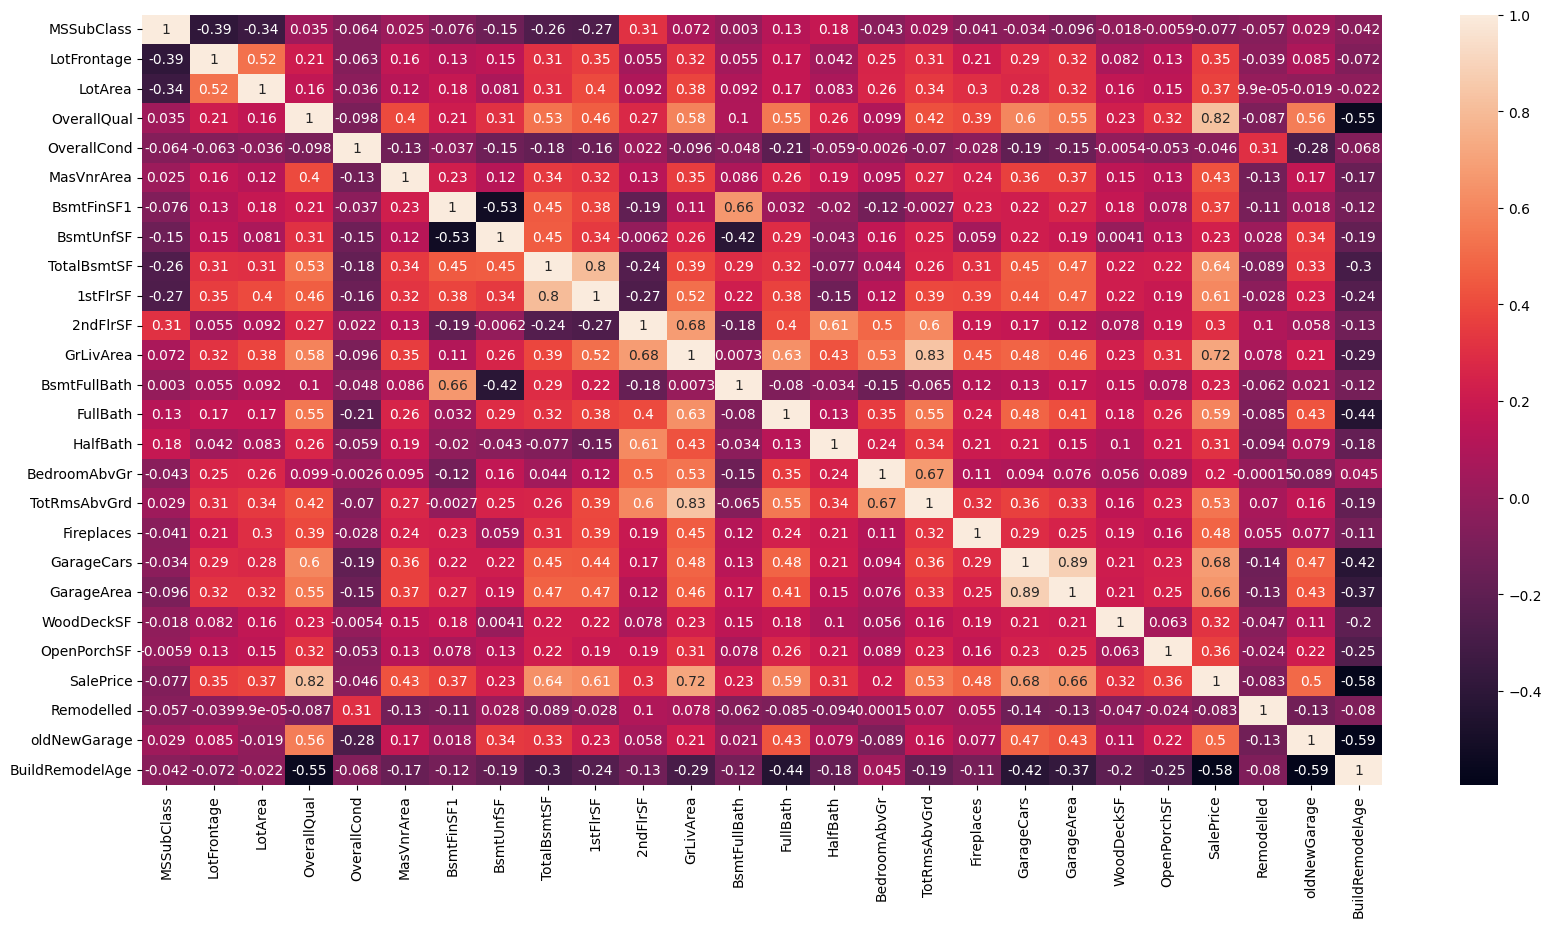

In [44]:
#Correlation matrix for the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_house.corr(), annot=True)
plt.show()

In [45]:
#Removing highly collinear features as discussed above.
df_house.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

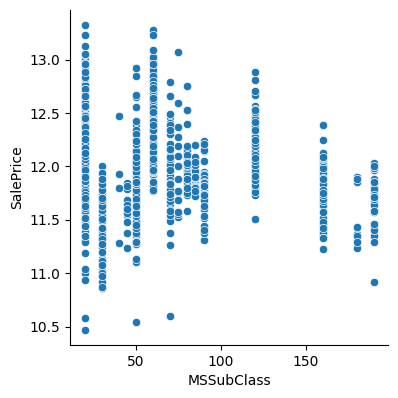

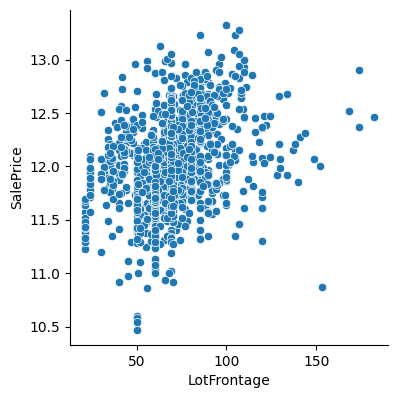

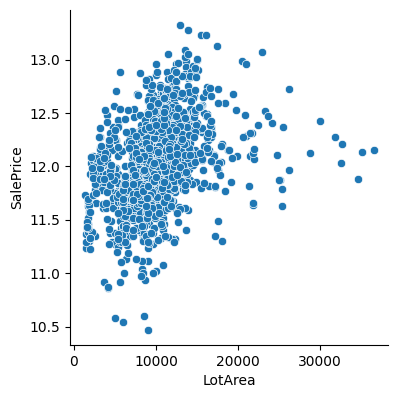

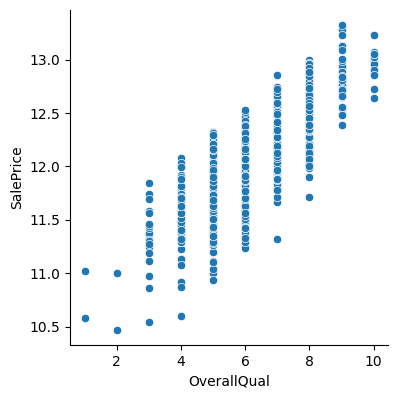

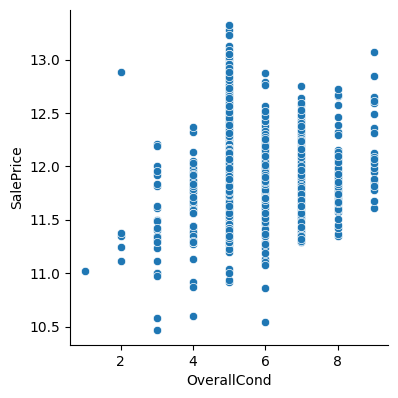

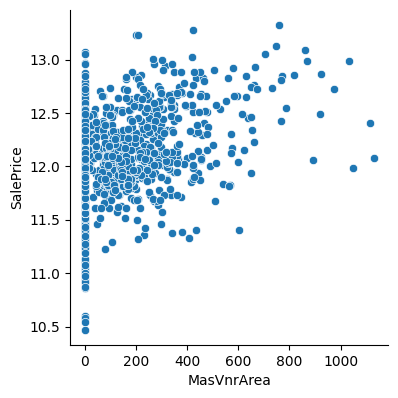

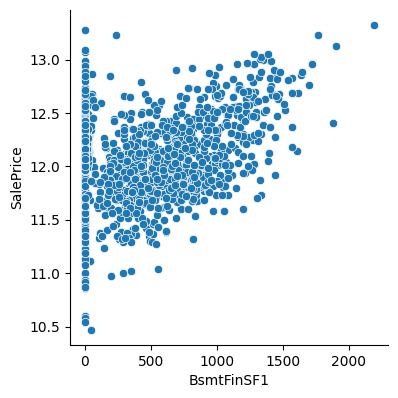

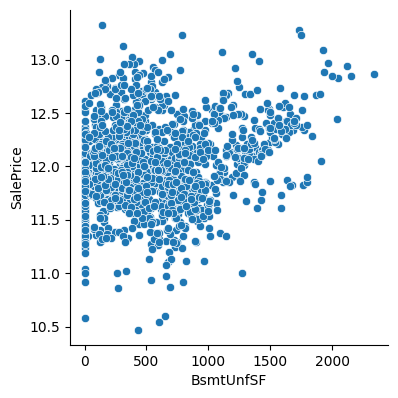

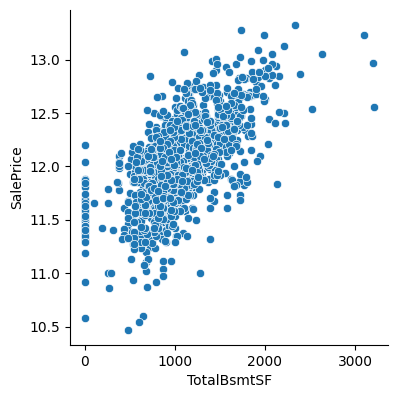

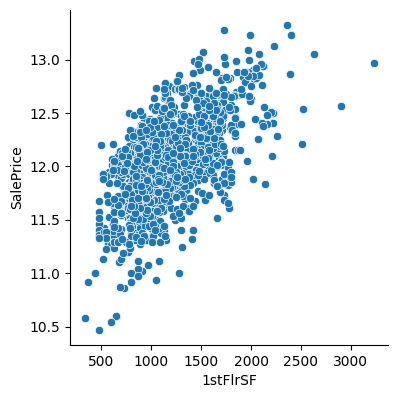

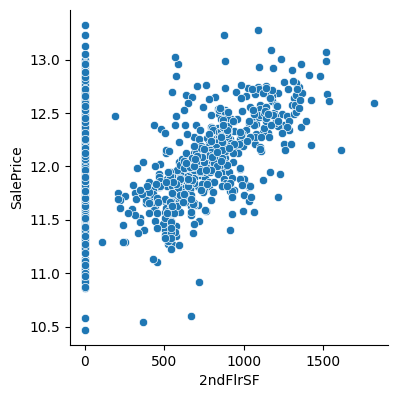

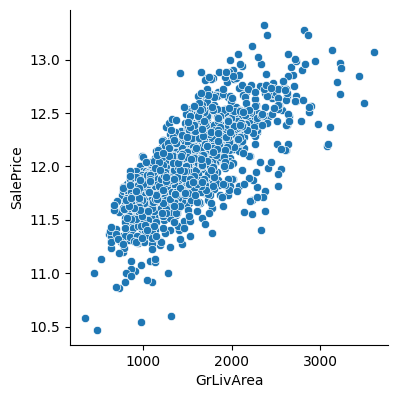

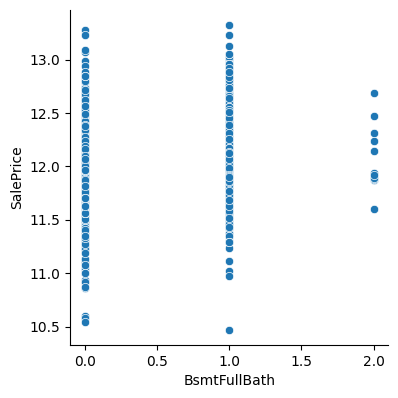

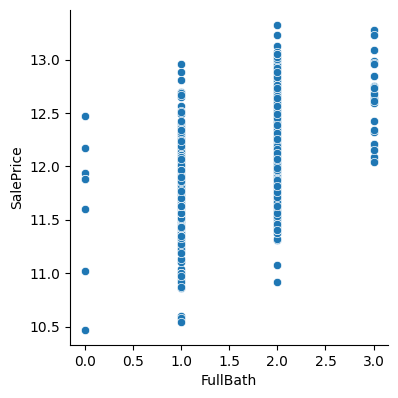

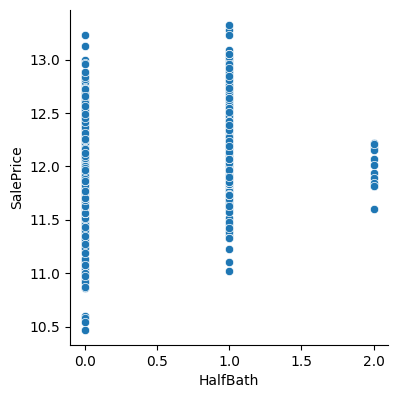

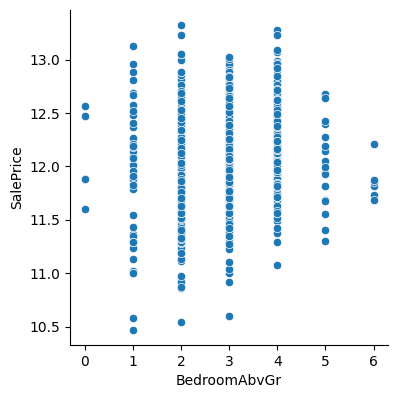

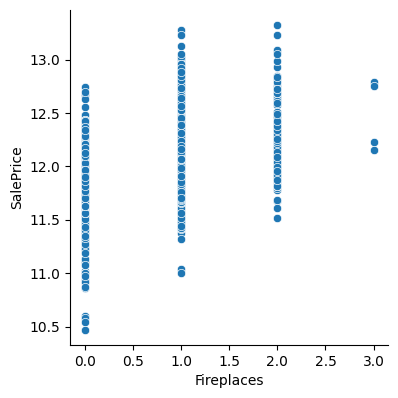

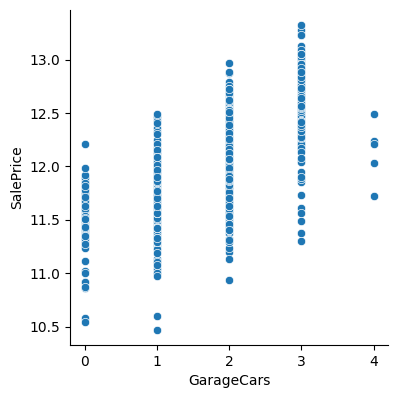

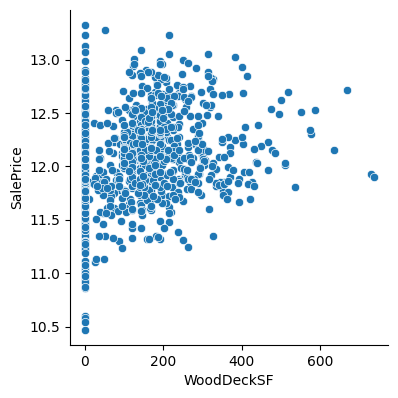

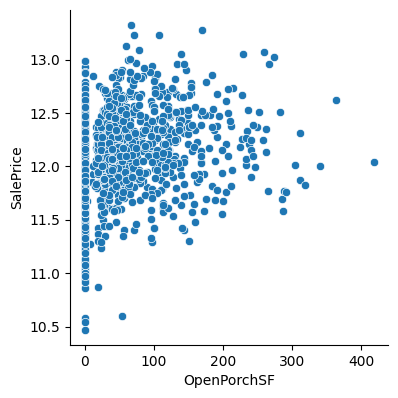

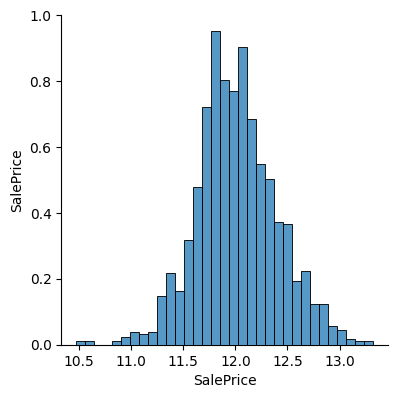

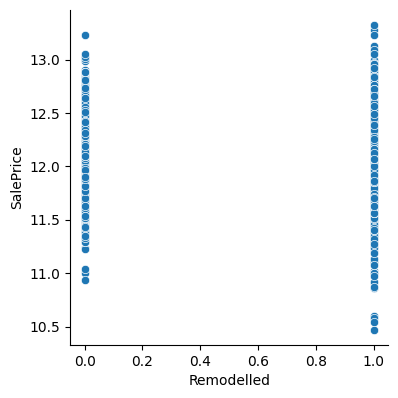

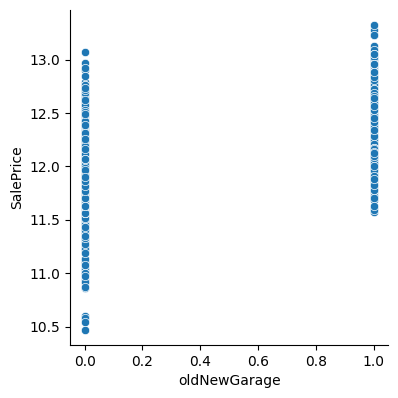

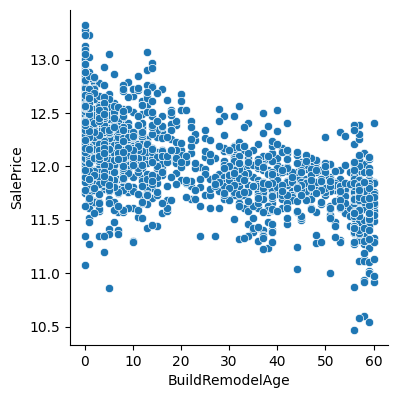

In [46]:
for col in df_house.select_dtypes(include=['int64','float64']).columns:
    sns.pairplot(df_house, x_vars=col, y_vars=target_variable,height=4, aspect=1,kind='scatter')

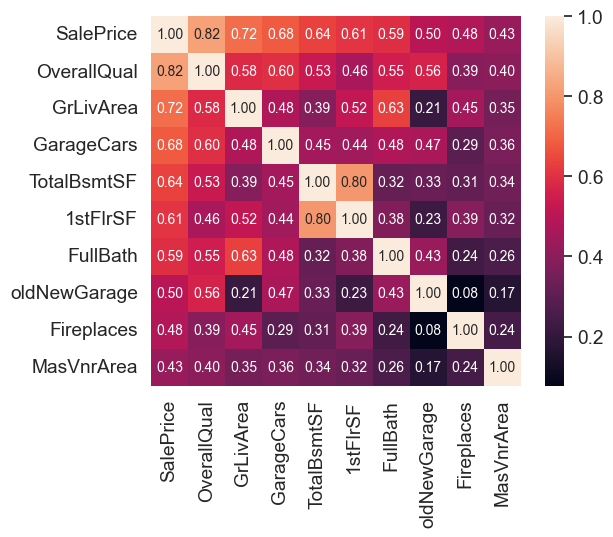

In [47]:
#Lets have a closer look at the correlation matrix with only high correlations with SalePrice
corMat = df_house.corr()
k = 10 #number of variables for heatmap
cols = corMat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [48]:
corMat['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
OverallQual        0.823638
GrLivArea          0.715378
GarageCars         0.681815
TotalBsmtSF        0.637739
1stFlrSF           0.607538
FullBath           0.594044
oldNewGarage       0.500927
Fireplaces         0.481773
MasVnrArea         0.426937
BsmtFinSF1         0.372670
LotArea            0.371636
OpenPorchSF        0.359684
LotFrontage        0.353979
WoodDeckSF         0.315834
HalfBath           0.312777
2ndFlrSF           0.298506
BsmtUnfSF          0.233309
BsmtFullBath       0.227979
BedroomAbvGr       0.203370
OverallCond       -0.045951
MSSubClass        -0.076847
Remodelled        -0.083047
BuildRemodelAge   -0.576661
Name: SalePrice, dtype: float64

In [49]:
corrmat_series = corMat.loc['SalePrice']
corrmat_series = corrmat_series[corrmat_series > 0.5]
corrmat_series

OverallQual     0.823638
TotalBsmtSF     0.637739
1stFlrSF        0.607538
GrLivArea       0.715378
FullBath        0.594044
GarageCars      0.681815
SalePrice       1.000000
oldNewGarage    0.500927
Name: SalePrice, dtype: float64

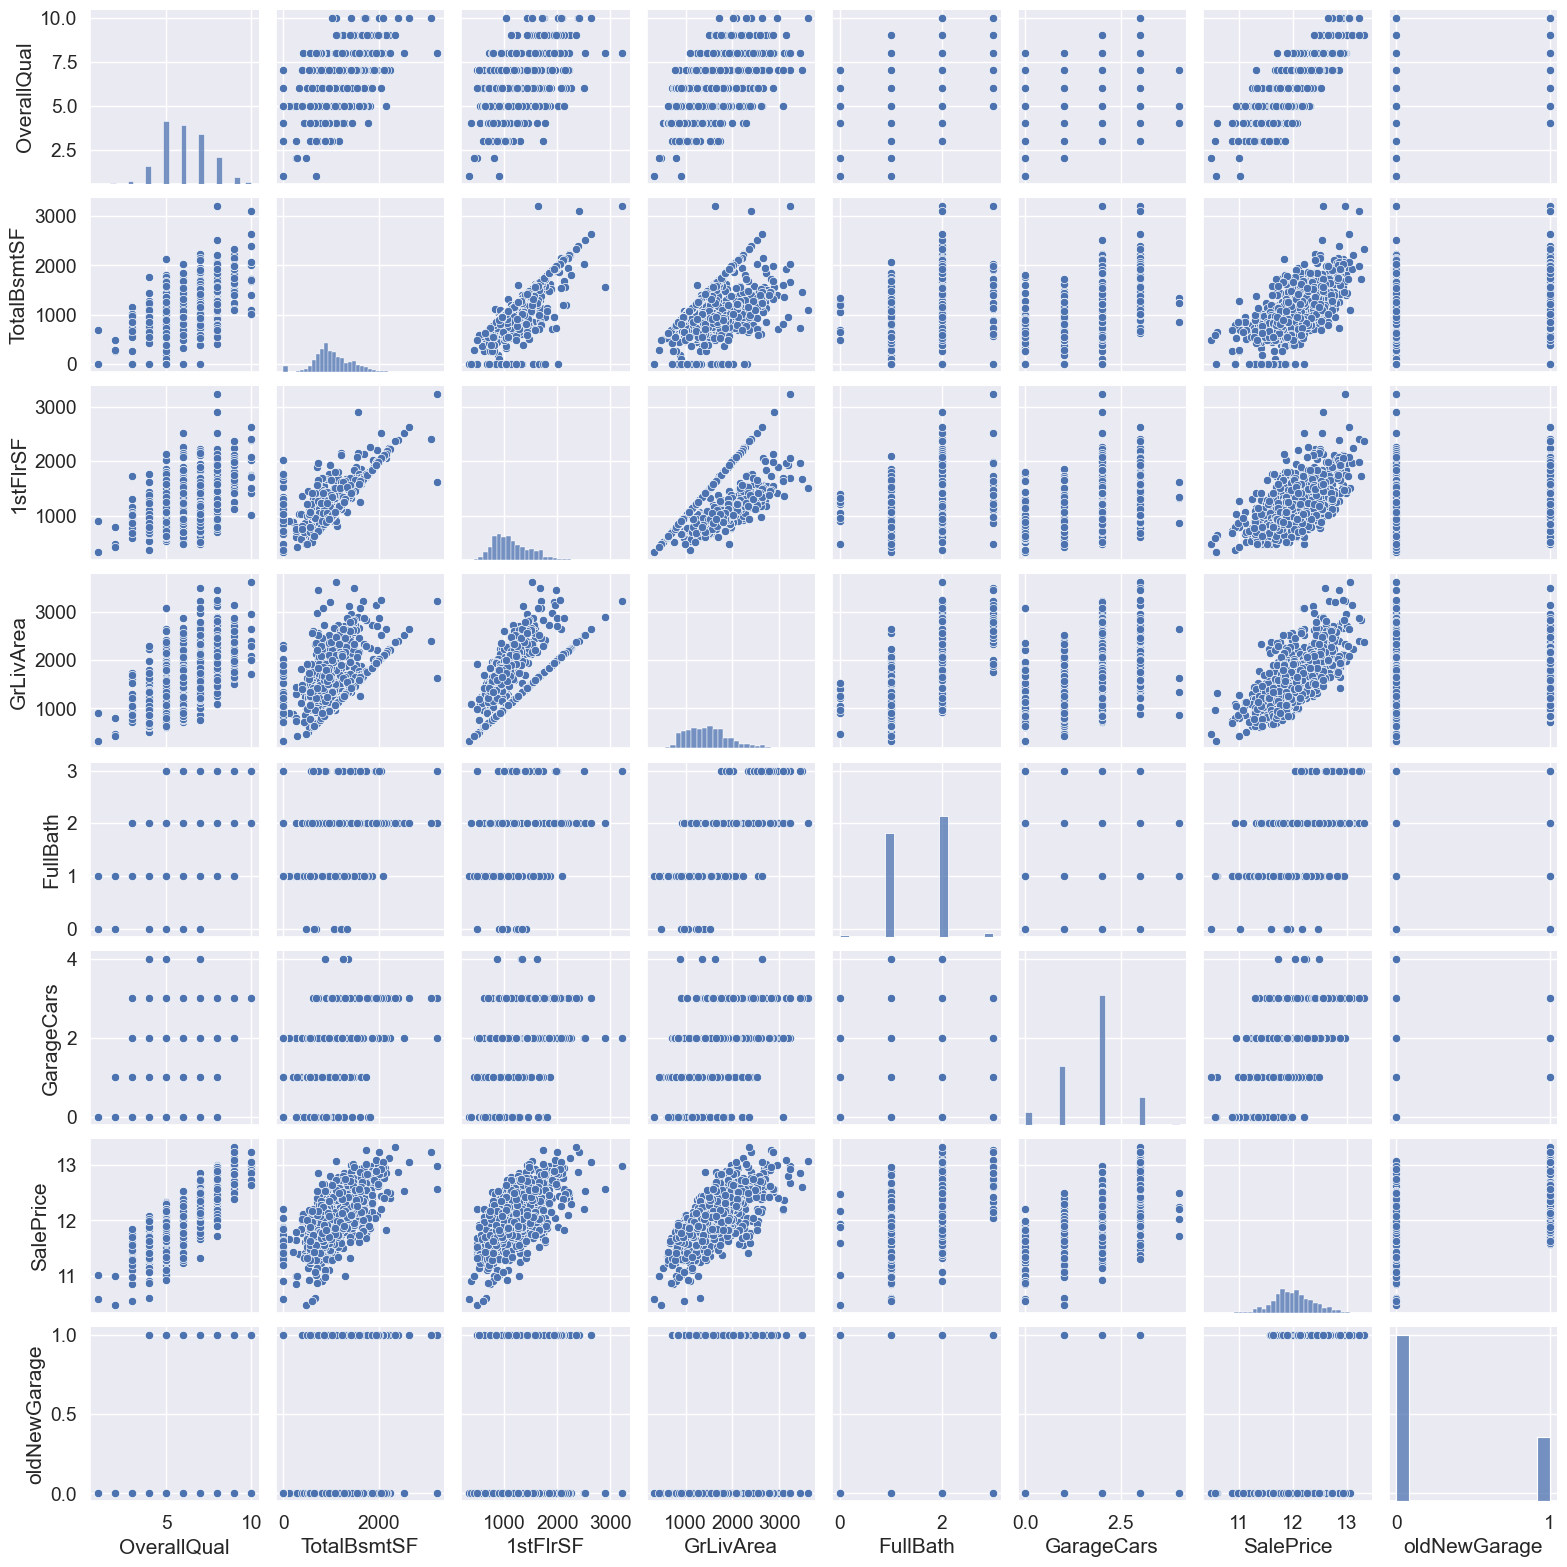

In [50]:
#Let us use pair plots to understand relationship of these variables with SalePrice
sns.pairplot(df_house[corrmat_series.index.to_list()],height=2)
plt.show()

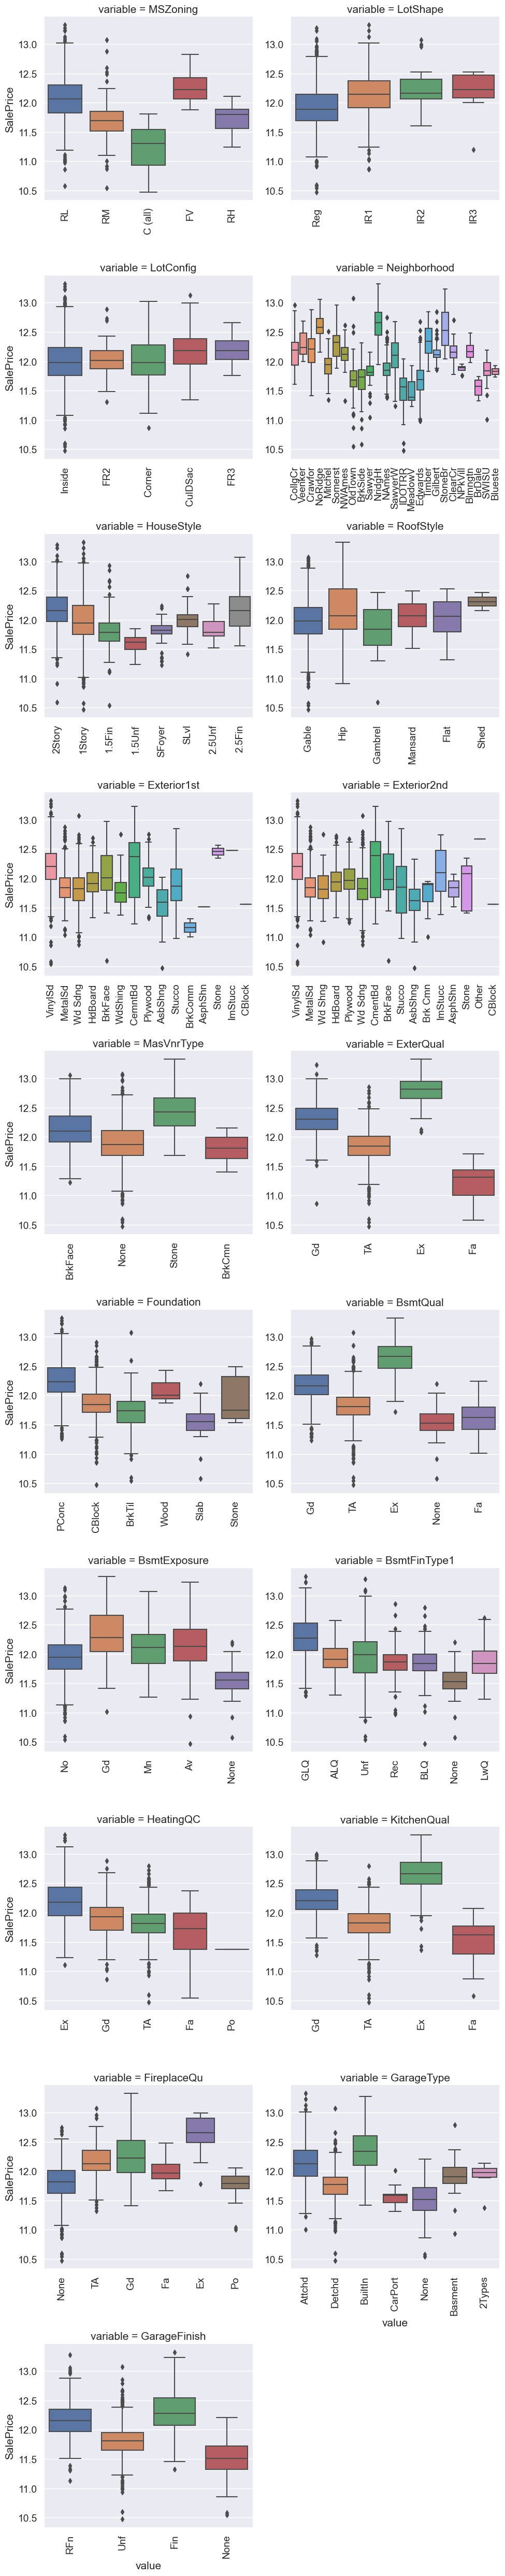

In [51]:
#Plotting box plot for Categorical features vs SalePrice
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
facet = pd.melt(df_house, id_vars=['SalePrice'], value_vars=df_house.select_dtypes(exclude=['int64','float64']).columns)
grid = sns.FacetGrid(facet, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
grid = grid.map(boxplot, "value", "SalePrice")

In [52]:

df_house_eda = df_house
categorical_col = df_house.select_dtypes(exclude=['int64','float64']).columns
#Dummy variable creation
df_house_dummy = pd.get_dummies(df_house_eda[categorical_col],drop_first=True)
df_house_dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  ...  FireplaceQu_TA  GarageType_Attchd  GarageType_Basment  \
0              0  ...               0                  1                   0   
1              0  ...               1                  1                   0   
2              0  ...               1                  1                   0   
3              0  ...               0                  0                   0   
4              0  ...               1                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  \
0                   0                   0                  0                0   
1                   0                   0                  0                0   
2                   0                   0                  0                0   
3                   0                   0                  1                0   
4                   0                   0                  0                0   

   GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  
0                  0                 1                 0  
1                  0                 1                 0  
2                  0                 1                 0  
3                  0                 0                 1  
4                  0                 1                 0  

[5 rows x 122 columns]

In [53]:
#Dropping duplicate Categorical columns
df_house_eda = df_house_eda.drop(categorical_col,axis=1)
df_house_eda.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  HalfBath  BedroomAbvGr  \
0         706        150          856       856  ...         1             3   
1         978        284         1262      1262  ...         0             3   
2         486        434          920       920  ...         1             3   
3         216        540          756       961  ...         0             3   
4         655        490         1145      1145  ...         1             4   

   Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  Remodelled  \
0           0           2           0           61  12.247699           0   
1           1           2         298            0  12.109016           0   
2           1           2           0           42  12.317171           1   
3           1           3           0           35  11.849405           1   
4           1           3         192           84  12.429220           0   

   oldNewGarage  BuildRemodelAge  
0             1                5  
1             0               31  
2             1                6  
3             0               36  
4             1                8  

[5 rows x 24 columns]

In [54]:
#Combining dummy variable dataset with original data
df_house_eda = pd.concat([df_house_eda, df_house_dummy], axis=1)
df_house_eda.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FireplaceQu_TA  \
0         706        150          856       856  ...               0   
1         978        284         1262      1262  ...               1   
2         486        434          920       920  ...               1   
3         216        540          756       961  ...               0   
4         655        490         1145      1145  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageFinish_None  \
0                   0                  0                0                  0   
1                   0                  0                0                  0   
2                   0                  0                0                  0   
3                   0                  1                0                  0   
4                   0                  0                0                  0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  

[5 rows x 146 columns]

In [55]:
df_house_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1459
Columns: 146 entries, MSSubClass to GarageFinish_Unf
dtypes: float64(3), int64(21), uint8(122)
memory usage: 483.5 KB


In [56]:
df_house_eda.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None', 'GarageFinish_None', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=146)

#### Model Building

In [57]:
y = df_house_eda['SalePrice']
y.head(10)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
5    11.870607
6    12.634606
7    12.206078
8    11.774528
9    11.678448
Name: SalePrice, dtype: float64

In [58]:
X = df_house_eda.drop(['SalePrice'],axis=1)
X.head(10)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   
5          50         85.0    14115            5            5         0.0   
6          20         75.0    10084            8            5       186.0   
7          60         69.0    10382            7            6       240.0   
8          50         51.0     6120            7            5         0.0   
9         190         50.0     7420            5            6         0.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FireplaceQu_TA  \
0         706        150          856       856  ...               0   
1         978        284         1262      1262  ...               1   
2         486        434          920       920  ...               1   
3         216        540          756       961  ...               0   
4         655        490         1145      1145  ...               1   
5         732         64          796       796  ...               0   
6        1369        317         1686      1694  ...               0   
7         859        216         1107      1107  ...               1   
8           0        952          952      1022  ...               1   
9         851        140          991      1077  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   
5                  1                   0                   0   
6                  1                   0                   0   
7                  1                   0                   0   
8                  0                   0                   0   
9                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageFinish_None  \
0                   0                  0                0                  0   
1                   0                  0                0                  0   
2                   0                  0                0                  0   
3                   0                  1                0                  0   
4                   0                  0                0                  0   
5                   0                  0                0                  0   
6                   0                  0                0                  0   
7                   0                  0                0                  0   
8                   0                  1                0                  0   
9                   0                  0                0                  0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  
5                 0                 1  
6                 1                 0  
7                 1                 0  
8                 0                 1  
9                 1                 0  

[10 rows x 145 columns]

In [59]:
# scaling the features

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None', 'GarageFinish_None', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=145)

In [60]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100, shuffle=True)

#### Linear Regression

In [61]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

rfe

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [62]:
rfe.support_

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [63]:
rfe.ranking_

array([ 1, 22,  1,  1,  1,  6,  1, 44,  1,  1, 21,  1,  1, 37, 23, 92, 88,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 87, 74, 75, 25, 27, 81, 85,
       66, 30, 65, 64, 69,  1,  1, 60, 31,  1, 28,  8, 70,  7,  1,  1,  1,
       26, 20, 67, 72,  1, 68, 77, 96,  1, 38, 53, 24, 71,  1, 15, 33, 16,
       34, 40, 83,  1,  1,  3, 94, 36, 80, 54, 41, 76,  1, 86,  1, 42, 59,
       55, 91,  1, 29, 63, 62,  9, 89, 61, 49,  1, 35,  1, 84, 43, 47, 11,
       95, 82, 39, 32,  1, 90, 46, 56,  1,  1,  2,  1,  1, 51, 50,  1, 45,
       78, 79,  4, 58, 10, 73, 52,  5, 19,  1,  1,  1, 14,  1, 17, 18,  1,
        1, 93, 13, 48, 12,  1,  1, 57,  1])

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 22),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 6),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 44),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 21),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 37),
 ('HalfBath', False, 23),
 ('BedroomAbvGr', False, 92),
 ('Fireplaces', False, 88),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('Remodelled', True, 1),
 ('oldNewGarage', True, 1),
 ('BuildRemodelAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 87),
 ('LotShape_IR3', False, 74),
 ('LotShape_Reg', False, 75),
 ('LotConfig_CulDSac', False, 25),
 ('LotConfig_FR2', False, 27),
 ('LotConfig_FR3', False, 81),
 ('LotConfig_Inside', False, 85),
 ('Neighborhood_Blueste', False, 66),
 ('Neighborhood_B

In [65]:
# predict prices of X_train
y_train_pred = rfe.predict(X_train)

# evaluate the model on train and test set
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.92354856366742


In [66]:
#Will consider only the columns that are returned as True from RFE
req_col = X_train.columns[rfe.support_]
X_train_rfe = X_train[req_col]
X_test_rfe = X_test[req_col]
X_train_rfe.head()

MSSubClass   LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  \
420    -0.873201 -0.274305    -1.526181     0.386957   -0.336316    -0.338432   
1421   -0.873201  3.951324    -0.792489     1.286930    0.379098     0.346447   
384     0.073475  0.596392    -0.058798    -0.513016    0.606623    -0.589473   
751    -0.873201 -0.152225     0.674894    -0.513016   -0.955559     1.984308   
971     0.310143  1.911589     1.408585     3.086876   -0.505200    -0.316497   

      1stFlrSF  GrLivArea  BsmtFullBath  GarageCars  ...  BsmtExposure_None  \
420  -0.666792  -1.212470     -0.819797   -1.024920  ...          -0.164928   
1421  0.099030  -0.635570     -0.819797   -1.024920  ...          -0.164928   
384  -0.947503   0.951420      1.147441    0.319468  ...          -0.164928   
751   1.865053   0.694791     -0.819797    0.319468  ...          -0.164928   
971  -0.642264   0.501807     -0.819797    0.319468  ...          -0.164928   

      KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  FireplaceQu_Gd  \
420        -0.164928       -0.817682        0.986846       -0.589422   
1421       -0.164928       -0.817682        0.986846       -0.589422   
384        -0.164928        1.222969       -1.013329       -0.589422   
751        -0.164928        1.222969       -1.013329        1.696578   
971        -0.164928        1.222969       -1.013329        1.696578   

      FireplaceQu_TA  GarageType_Attchd  GarageType_None  GarageFinish_None  \
420        -0.517366          -1.214141        -0.239749          -0.239749   
1421       -0.517366           0.823628        -0.239749          -0.239749   
384         1.932867          -1.214141        -0.239749          -0.239749   
751        -0.517366           0.823628        -0.239749          -0.239749   
971        -0.517366           0.823628        -0.239749          -0.239749   

      GarageFinish_Unf  
420           1.183075  
1421          1.183075  
384          -0.845255  
751          -0.845255  
971           1.183075  

[5 rows x 50 columns]

In [67]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', '2ndFlrSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Ex

In [68]:
#Building linear regression again with columns selected from RFE
lm.fit(X_train_rfe,y_train)

#r2 Score for training data prediction
y_train_pred = lm.predict(X_train_rfe)
r2_score(y_true=y_train,y_pred=y_train_pred)

0.92354856366742

In [69]:
#r2 Score for training data prediction
y_test_pred = lm.predict(X_test_rfe)
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9040929757382727

In [70]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(f"r2_train_lr = {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(f"r2_test_lr = {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(f"rss1_lr = {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(f"rss2_lr = {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(f"mse_train_lr = {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(f"mse_test_lr = {mse_test_lr}")
metric.append(mse_test_lr**0.5)

r2_train_lr = 0.92354856366742
r2_test_lr = 0.9040929757382727
rss1_lr = 11.535099963253828
rss2_lr = 6.372938897799037
mse_train_lr = 0.011489143389695047
mse_test_lr = 0.014786401154986166


In [71]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

11.535099963253828
0.011489143389695047
0.10718742178863641


## Ridge and Lasso Regression

Let's now try predicting, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [72]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [74]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-0.02134828  0.01889096  0.07124825  0.05360493  0.03203595  0.04660277
 -0.00500646  0.1145832   0.01121071  0.03611899  0.01171325  0.01213656
 -0.01779326  0.02260266 -0.02694893  0.04565149  0.00845906  0.06295888
  0.03152695  0.02350484 -0.01351785 -0.00991077  0.01374638  0.01934677
 -0.01733852  0.01696741 -0.01646432  0.00861837 -0.02009857  0.01417491
  0.00917083 -0.02293324 -0.00220398 -0.01183576  0.01333983  0.02649388
 -0.01374294 -0.02309239 -0.03779742  0.01556005 -0.01349087 -0.02044198
 -0.02256157 -0.0309543   0.01856474  0.01071671  0.010856   -0.00682525
 -0.00682525 -0.01089259]


In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r2_train_lr \t = {r2_train_lr}")
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r2_test_lr \t = {r2_test_lr}")
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss1_lr \t = {rss1_lr}")
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss2_lr \t = {rss2_lr}")
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse_train_lr \t = {mse_train_lr}")
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse_test_lr \t = {mse_test_lr}")
metric2.append(mse_test_lr**0.5)

r2_train_lr 	 = 0.9219998765756244
r2_test_lr 	 = 0.9017608879196345
rss1_lr 	 = 11.768768044229423
rss2_lr 	 = 6.52790411840607
mse_train_lr 	 = 0.01172188052214086
mse_test_lr 	 = 0.015145949230640533


In [76]:
# display the mean scores

ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
23          20         -0.077772        -0.083430                1
22        10.0         -0.077573        -0.083432                2
21         9.0         -0.077551        -0.083433                3
20         8.0         -0.077529        -0.083434                4
19         7.0         -0.077505        -0.083437                5
18         6.0         -0.077480        -0.083442                6
17         5.0         -0.077453        -0.083446                7
16         4.0         -0.077422        -0.083449                8
15         3.0         -0.077386        -0.083452                9
14         2.0         -0.077345        -0.083455               10
13         1.0         -0.077298        -0.083487               11
12         0.9         -0.077293        -0.083496               12
11         0.8         -0.077288        -0.083505               13
10         0.7         -0.077282        -0.083514               14
9          0.6         -0.077277        -0.083524               15
8          0.5         -0.077271        -0.083533               16
24          50         -0.078278        -0.083534               17
7          0.4         -0.077266        -0.083543               18
6          0.3         -0.077260        -0.083553               19
5          0.2         -0.077254        -0.083563               20
4          0.1         -0.077248        -0.083574               21
3         0.05         -0.077245        -0.083579               22
2         0.01         -0.077243        -0.083583               23
1        0.001         -0.077243        -0.083584               24
0       0.0001         -0.077243        -0.083585               25
25         100         -0.079033        -0.083768               26
26         500         -0.087760        -0.091334               27

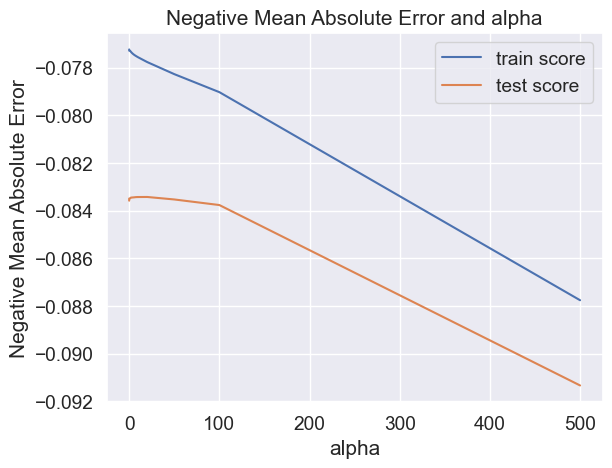

In [77]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [78]:
mean_squared_error(y_test, ridge.predict(X_test_rfe))

0.015145949230640533

In [79]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             MSSubClass      -0.0213
1                LotArea       0.0189
2            OverallQual       0.0712
3            OverallCond       0.0536
4             BsmtFinSF1       0.0320
5            TotalBsmtSF       0.0466
6               1stFlrSF      -0.0050
7              GrLivArea       0.1146
8           BsmtFullBath       0.0112
9             GarageCars       0.0361
10            WoodDeckSF       0.0117
11           OpenPorchSF       0.0121
12            Remodelled      -0.0178
13          oldNewGarage       0.0226
14       BuildRemodelAge      -0.0269
15           MSZoning_FV       0.0457
16           MSZoning_RH       0.0085
17           MSZoning_RL       0.0630
18           MSZoning_RM       0.0315
19  Neighborhood_Crawfor       0.0235
20  Neighborhood_Edwards      -0.0135
21  Neighborhood_MeadowV      -0.0099
22  Neighborhood_NoRidge       0.0137
23  Neighborhood_NridgHt       0.0193
24  Neighborhood_OldTown      -0.0173
25  Neighborhood_StoneBr       0.0170
26     HouseStyle_1Story      -0.0165
27       HouseStyle_SLvl       0.0086
28   Exterior1st_BrkComm      -0.0201
29   Exterior1st_BrkFace       0.0142
30    Exterior1st_Stucco       0.0092
31   Exterior1st_Wd Sdng      -0.0229
32    Exterior2nd_CBlock      -0.0022
33    Exterior2nd_Stucco      -0.0118
34   Exterior2nd_Wd Sdng       0.0133
35      Foundation_PConc       0.0265
36           BsmtQual_Fa      -0.0137
37           BsmtQual_Gd      -0.0231
38           BsmtQual_TA      -0.0378
39       BsmtExposure_Gd       0.0156
40     BsmtExposure_None      -0.0135
41        KitchenQual_Fa      -0.0204
42        KitchenQual_Gd      -0.0226
43        KitchenQual_TA      -0.0310
44        FireplaceQu_Gd       0.0186
45        FireplaceQu_TA       0.0107
46     GarageType_Attchd       0.0109
47       GarageType_None      -0.0068
48     GarageFinish_None      -0.0068
49      GarageFinish_Unf      -0.0109

In [80]:
print("Ridge Score for Train Set: ",round(ridge.score(X_train_rfe,y_train),2))

Ridge Score for Train Set:  0.92


In [81]:
print("Ridge Score for Test Set: ",round(ridge.score(X_test_rfe, y_test),2))

Ridge Score for Test Set:  0.9


In [82]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train_rfe.columns))
ridge_coeff_dict

{'MSSubClass': -0.0213,
 'LotArea': 0.0189,
 'OverallQual': 0.0712,
 'OverallCond': 0.0536,
 'BsmtFinSF1': 0.032,
 'TotalBsmtSF': 0.0466,
 '1stFlrSF': -0.005,
 'GrLivArea': 0.1146,
 'BsmtFullBath': 0.0112,
 'GarageCars': 0.0361,
 'WoodDeckSF': 0.0117,
 'OpenPorchSF': 0.0121,
 'Remodelled': -0.0178,
 'oldNewGarage': 0.0226,
 'BuildRemodelAge': -0.0269,
 'MSZoning_FV': 0.0457,
 'MSZoning_RH': 0.0085,
 'MSZoning_RL': 0.063,
 'MSZoning_RM': 0.0315,
 'Neighborhood_Crawfor': 0.0235,
 'Neighborhood_Edwards': -0.0135,
 'Neighborhood_MeadowV': -0.0099,
 'Neighborhood_NoRidge': 0.0137,
 'Neighborhood_NridgHt': 0.0193,
 'Neighborhood_OldTown': -0.0173,
 'Neighborhood_StoneBr': 0.017,
 'HouseStyle_1Story': -0.0165,
 'HouseStyle_SLvl': 0.0086,
 'Exterior1st_BrkComm': -0.0201,
 'Exterior1st_BrkFace': 0.0142,
 'Exterior1st_Stucco': 0.0092,
 'Exterior1st_Wd Sdng': -0.0229,
 'Exterior2nd_CBlock': -0.0022,
 'Exterior2nd_Stucco': -0.0118,
 'Exterior2nd_Wd Sdng': 0.0133,
 'Foundation_PConc': 0.0265,
 'Bsm

In [83]:
#RFE

# Do an RFE to minimise the features to 15
X_train_ridge = X_train_rfe[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train_ridge, y_train)

In [84]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
5          GrLivArea         True            1       0.1146
1        OverallQual         True            1       0.0712
10       MSZoning_RL         True            1       0.0630
2        OverallCond         True            1       0.0536
4        TotalBsmtSF         True            1       0.0466
8        MSZoning_FV         True            1       0.0457
6         GarageCars         True            1       0.0361
3         BsmtFinSF1         True            1       0.0320
11       MSZoning_RM         True            1       0.0315
18  Foundation_PConc         True            1       0.0265

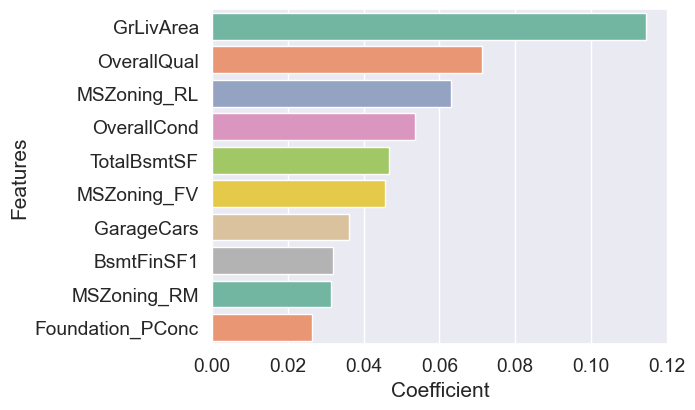

In [85]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Lasso Regression

In [86]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [88]:
# display the mean scores

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.077273        -0.083541                1
1        0.001         -0.078086        -0.084131                2
2         0.01         -0.086173        -0.090786                3
3         0.05         -0.116799        -0.118166                4
4          0.1         -0.154309        -0.155345                5
5          0.2         -0.226183        -0.226642                6
6          0.3         -0.293464        -0.293641                7
25         100         -0.301123        -0.301239                8
24          50         -0.301123        -0.301239                8
23          20         -0.301123        -0.301239                8
22        10.0         -0.301123        -0.301239                8
21         9.0         -0.301123        -0.301239                8
20         8.0         -0.301123        -0.301239                8
19         7.0         -0.301123        -0.301239                8
18         6.0         -0.301123        -0.301239                8
17         5.0         -0.301123        -0.301239                8
13         1.0         -0.301123        -0.301239                8
15         3.0         -0.301123        -0.301239                8
14         2.0         -0.301123        -0.301239                8
26         500         -0.301123        -0.301239                8
12         0.9         -0.301123        -0.301239                8
11         0.8         -0.301123        -0.301239                8
10         0.7         -0.301123        -0.301239                8
9          0.6         -0.301123        -0.301239                8
8          0.5         -0.301123        -0.301239                8
7          0.4         -0.301123        -0.301239                8
16         4.0         -0.301123        -0.301239                8
27        1000         -0.301123        -0.301239                8

In [89]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [90]:
lasso.coef_

array([-2.32189820e-02,  1.79632140e-02,  6.88539993e-02,  5.40228773e-02,
        3.10377423e-02,  5.22028827e-02, -1.71561294e-02,  1.25873107e-01,
        1.16522504e-02,  3.62361035e-02,  1.12309870e-02,  1.04426039e-02,
       -1.76163231e-02,  2.17082798e-02, -2.58214384e-02,  8.30381699e-02,
        2.62369549e-02,  1.34114557e-01,  9.55467018e-02,  2.38875187e-02,
       -1.38761220e-02, -1.01612929e-02,  1.30940944e-02,  1.86466384e-02,
       -1.89191030e-02,  1.75285810e-02, -1.02045967e-02,  1.15374935e-02,
       -2.06601706e-02,  1.38190665e-02,  9.62991654e-03, -2.44839752e-02,
       -2.12494073e-03, -1.30265099e-02,  1.48134286e-02,  2.53497938e-02,
       -1.58052921e-02, -2.72969058e-02, -4.30513597e-02,  1.57386845e-02,
       -1.38080710e-02, -2.06449552e-02, -2.65863130e-02, -3.52600015e-02,
        1.78414746e-02,  1.00727528e-02,  1.09148186e-02, -1.30774106e-02,
       -4.24405323e-18, -1.12968636e-02])

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r2_train_lr \t = {r2_train_lr}")
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r2_test_lr \t = {r2_test_lr}")
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss1_lr \t = {rss1_lr}")
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss2_lr \t = {rss2_lr}")
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse_train_lr \t = {mse_train_lr}")
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse_test_lr \t = {mse_test_lr}")
metric3.append(mse_test_lr**0.5)

r2_train_lr 	 = 0.9235223020636625
r2_test_lr 	 = 0.9042879152570029
rss1_lr 	 = 11.539062350869678
rss2_lr 	 = 6.359985335208625
mse_train_lr 	 = 0.011493089990906053
mse_test_lr 	 = 0.014756346485402843


In [92]:
# Checking the mean squared error
mean_squared_error(y_test, lasso.predict(X_test_rfe))

0.014756346485402843

In [93]:
# Putting the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             MSSubClass      -0.0232
1                LotArea       0.0180
2            OverallQual       0.0689
3            OverallCond       0.0540
4             BsmtFinSF1       0.0310
5            TotalBsmtSF       0.0522
6               1stFlrSF      -0.0172
7              GrLivArea       0.1259
8           BsmtFullBath       0.0117
9             GarageCars       0.0362
10            WoodDeckSF       0.0112
11           OpenPorchSF       0.0104
12            Remodelled      -0.0176
13          oldNewGarage       0.0217
14       BuildRemodelAge      -0.0258
15           MSZoning_FV       0.0830
16           MSZoning_RH       0.0262
17           MSZoning_RL       0.1341
18           MSZoning_RM       0.0955
19  Neighborhood_Crawfor       0.0239
20  Neighborhood_Edwards      -0.0139
21  Neighborhood_MeadowV      -0.0102
22  Neighborhood_NoRidge       0.0131
23  Neighborhood_NridgHt       0.0186
24  Neighborhood_OldTown      -0.0189
25  Neighborhood_StoneBr       0.0175
26     HouseStyle_1Story      -0.0102
27       HouseStyle_SLvl       0.0115
28   Exterior1st_BrkComm      -0.0207
29   Exterior1st_BrkFace       0.0138
30    Exterior1st_Stucco       0.0096
31   Exterior1st_Wd Sdng      -0.0245
32    Exterior2nd_CBlock      -0.0021
33    Exterior2nd_Stucco      -0.0130
34   Exterior2nd_Wd Sdng       0.0148
35      Foundation_PConc       0.0253
36           BsmtQual_Fa      -0.0158
37           BsmtQual_Gd      -0.0273
38           BsmtQual_TA      -0.0431
39       BsmtExposure_Gd       0.0157
40     BsmtExposure_None      -0.0138
41        KitchenQual_Fa      -0.0206
42        KitchenQual_Gd      -0.0266
43        KitchenQual_TA      -0.0353
44        FireplaceQu_Gd       0.0178
45        FireplaceQu_TA       0.0101
46     GarageType_Attchd       0.0109
47       GarageType_None      -0.0131
48      GarageFinish_Unf      -0.0113

In [94]:
# Putting the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_rfe.columns))
lasso_coeff_dict

{'MSSubClass': -0.023218981999272838,
 'LotArea': 0.0179632140370776,
 'OverallQual': 0.06885399934813428,
 'OverallCond': 0.05402287732502449,
 'BsmtFinSF1': 0.03103774230035334,
 'TotalBsmtSF': 0.05220288270081485,
 '1stFlrSF': -0.01715612943226741,
 'GrLivArea': 0.1258731069706824,
 'BsmtFullBath': 0.011652250372429514,
 'GarageCars': 0.03623610353653001,
 'WoodDeckSF': 0.011230986966034166,
 'OpenPorchSF': 0.010442603922185158,
 'Remodelled': -0.017616323050090744,
 'oldNewGarage': 0.021708279786000234,
 'BuildRemodelAge': -0.025821438417005283,
 'MSZoning_FV': 0.08303816987019116,
 'MSZoning_RH': 0.026236954870506583,
 'MSZoning_RL': 0.1341145574213722,
 'MSZoning_RM': 0.09554670182683836,
 'Neighborhood_Crawfor': 0.023887518663480357,
 'Neighborhood_Edwards': -0.01387612200479886,
 'Neighborhood_MeadowV': -0.010161292901692025,
 'Neighborhood_NoRidge': 0.013094094362806922,
 'Neighborhood_NridgHt': 0.01864663835036366,
 'Neighborhood_OldTown': -0.01891910302694394,
 'Neighborhood

In [95]:
# RFE to minimise the features

X_train_lasso = X_train_rfe[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)

In [96]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assigning top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
10  MSZoning_RL         True            1     0.134115
5     GrLivArea         True            1     0.125873
11  MSZoning_RM         True            1     0.095547
8   MSZoning_FV         True            1     0.083038
1   OverallQual         True            1     0.068854
2   OverallCond         True            1     0.054023
4   TotalBsmtSF         True            1     0.052203
6    GarageCars         True            1     0.036236
3    BsmtFinSF1         True            1     0.031038
9   MSZoning_RH         True            1     0.026237

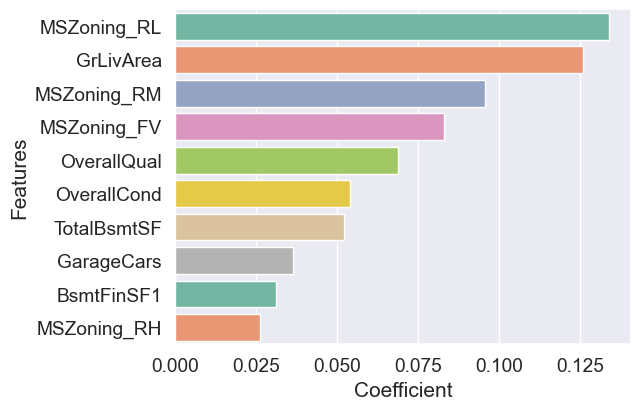

In [97]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

In [98]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.923549          0.922000          0.923522
1   R2 Score (Test)           0.904093          0.901761          0.904288
2       RSS (Train)          11.535100         11.768768         11.539062
3        RSS (Test)           6.372939          6.527904          6.359985
4       MSE (Train)           0.107187          0.108268          0.107206
5        MSE (Test)           0.121599          0.123069          0.121476

In [99]:
# excluding the five most important predictor variables.
top_five_variables = [
    'MSZoning_RL',
    'GrLivArea',
    'MSZoning_RM',
    'MSZoning_FV',
    'OverallQual'
]
X_train_exclude = X_train.drop(top_five_variables, axis=1)
X_test_exclude = X_test.drop(top_five_variables, axis=1)
X_train_exclude.head()

MSSubClass  LotFrontage   LotArea  OverallCond  MasVnrArea  BsmtFinSF1  \
420    -0.873201     0.384250 -0.274305     0.386957   -0.589658   -0.336316   
1421   -0.873201    -0.018451  3.951324     1.286930    0.529546    0.379098   
384     0.073475     0.082224  0.596392    -0.513016   -0.589658    0.606623   
751    -0.873201     0.031886 -0.152225    -0.513016   -0.589658   -0.955559   
971     0.310143     2.599107  1.911589     3.086876   -0.589658   -0.505200   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  FireplaceQu_TA  \
420    0.113268    -0.338432 -0.666792 -0.796780  ...       -0.517366   
1421   0.059021     0.346447  0.099030 -0.796780  ...       -0.517366   
384   -1.028177    -0.589473 -0.947503  1.912016  ...        1.932867   
751    2.864036     1.984308  1.865053 -0.796780  ...       -0.517366   
971    0.296351    -0.316497 -0.642264  1.137071  ...       -0.517366   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
420           -1.214141           -0.115836           -0.252489   
1421           0.823628           -0.115836           -0.252489   
384           -1.214141           -0.115836            3.960561   
751            0.823628           -0.115836           -0.252489   
971            0.823628           -0.115836           -0.252489   

      GarageType_CarPort  GarageType_Detchd  GarageType_None  \
420            -0.079444           1.660284        -0.239749   
1421           -0.079444          -0.602306        -0.239749   
384            -0.079444          -0.602306        -0.239749   
751            -0.079444          -0.602306        -0.239749   
971            -0.079444          -0.602306        -0.239749   

      GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  
420           -0.239749         -0.641103          1.183075  
1421          -0.239749         -0.641103          1.183075  
384           -0.239749         -0.641103         -0.845255  
751           -0.239749         -0.641103         -0.845255  
971           -0.239749         -0.641103          1.183075  

[5 rows x 140 columns]

In [101]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_exclude, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [103]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_exclude, y_train) 

Lasso(alpha=0.001)

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_exclude)
y_pred_test = lasso.predict(X_test_exclude)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"r2_train_lr \t = {r2_train_lr}")
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"r2_test_lr \t = {r2_test_lr}")
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"rss1_lr \t = {rss1_lr}")
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"rss2_lr \t = {rss2_lr}")
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"mse_train_lr \t = {mse_train_lr}")
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"mse_test_lr \t = {mse_test_lr}")
metric4.append(mse_test_lr**0.5)

r2_train_lr 	 = 0.9197896179901999
r2_test_lr 	 = 0.8944358885634563
rss1_lr 	 = 12.102254960245002
rss2_lr 	 = 7.014643996769383
mse_train_lr 	 = 0.012054038805024902
mse_test_lr 	 = 0.016275276094592537


In [105]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls_exclude_metric = pd.Series(metric4, name = 'Lasso Top five exclude')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, ls_exclude_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)           0.923549          0.922000          0.923522   
1   R2 Score (Test)           0.904093          0.901761          0.904288   
2       RSS (Train)          11.535100         11.768768         11.539062   
3        RSS (Test)           6.372939          6.527904          6.359985   
4       MSE (Train)           0.107187          0.108268          0.107206   
5        MSE (Test)           0.121599          0.123069          0.121476   

   Lasso Top five exclude  
0                0.919790  
1                0.894436  
2               12.102255  
3                7.014644  
4                0.109791  
5                0.127575

In [107]:
# Checking the mean squared error
mean_squared_error(y_test, lasso.predict(X_test_exclude))

0.016275276094592537

In [108]:
# Putting the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_exclude.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            MSSubClass      -0.0176
1           LotFrontage       0.0113
2               LotArea       0.0139
3           OverallCond       0.0617
4            MasVnrArea       0.0046
..                  ...          ...
108  GarageType_BuiltIn       0.0029
109  GarageType_CarPort      -0.0004
110     GarageType_None      -0.0145
111    GarageFinish_RFn      -0.0049
112    GarageFinish_Unf      -0.0121

[113 rows x 2 columns]

In [110]:
# Putting the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train_exclude.columns))
lasso_coeff_dict

{'MSSubClass': -0.017637283203536323,
 'LotFrontage': 0.011279651584669594,
 'LotArea': 0.013915530738841038,
 'OverallCond': 0.06167818355900677,
 'MasVnrArea': 0.004561414724283149,
 'BsmtFinSF1': 0.02350797069145673,
 'BsmtUnfSF': -0.0032024584820790356,
 'TotalBsmtSF': 0.06461713512204402,
 '1stFlrSF': 0.08093998580764783,
 '2ndFlrSF': 0.10434850526450141,
 'BsmtFullBath': 0.007036776447100929,
 'FullBath': 0.015195592355139908,
 'HalfBath': 0.015154817005475016,
 'BedroomAbvGr': 0.0015745992509582775,
 'Fireplaces': 0.005141234052253832,
 'GarageCars': 0.03540610456261981,
 'WoodDeckSF': 0.009782860382945424,
 'OpenPorchSF': 0.012232458435873249,
 'Remodelled': -0.017825287955414406,
 'oldNewGarage': 0.021231463329823806,
 'BuildRemodelAge': -0.02345929448521165,
 'MSZoning_RH': -0.005476278192876265,
 'LotShape_IR2': 0.0014811823436462887,
 'LotShape_IR3': -0.001157295075774282,
 'LotShape_Reg': -0.001751737998984387,
 'LotConfig_CulDSac': 0.0050017994380686485,
 'LotConfig_FR2':

In [111]:
# RFE to minimise the features

X_train_lasso = X_train_exclude[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)

In [112]:
# Assigning top 10 features to a temp dataframe for further display in the bar plot

temp3_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp3_df = temp3_df.loc[temp3_df['rfe_support'] == True]
temp3_df.reset_index(drop=True, inplace=True)

temp3_df['Coefficient'] = temp3_df['Features'].apply(find)
temp3_df = temp3_df.sort_values(by=['Coefficient'], ascending=False)
temp3_df = temp3_df.head(5)
temp3_df

Features  rfe_support  rfe_ranking  Coefficient
8      2ndFlrSF         True            1     0.104349
7      1stFlrSF         True            1     0.080940
6   TotalBsmtSF         True            1     0.064617
3   OverallCond         True            1     0.061678
12   GarageCars         True            1     0.035406

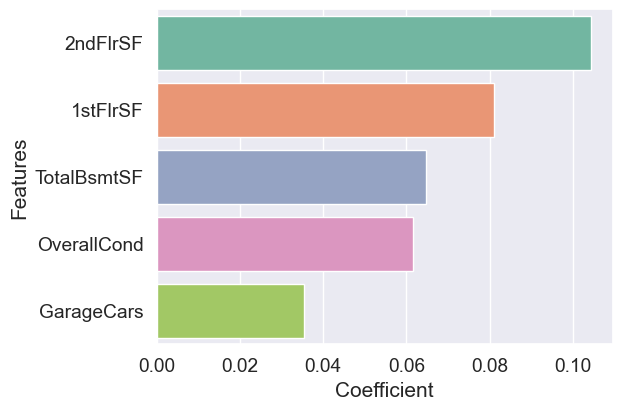

In [113]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp3_df)
plt.show()